In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz

--2025-05-22 14:03:23--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1379902 (1.3M) [application/x-gzip]
Saving to: ‚ÄòGCF_000005845.2_ASM584v2_genomic.fna.gz‚Äô

GCF_000005845.2_ASM 100%[===================>]   1.32M  --.-KB/s    in 0.1s    

2025-05-22 14:03:23 (11.3 MB/s) - ‚ÄòGCF_000005845.2_ASM584v2_genomic.fna.gz‚Äô saved [1379902/1379902]



In [ ]:
!ls -hlrt

total 1.4M
-rw-r--r-- 1 root root 1.4M Oct 31  2014 GCF_000005845.2_ASM584v2_genomic.fna.gz
drwxr-xr-x 1 root root 4.0K May 14 13:38 sample_data


In [ ]:
!gzip -d GCF_000005845.2_ASM584v2_genomic.fna.gz

In [ ]:
!ls -hlrt

total 4.5M
-rw-r--r-- 1 root root 4.5M Oct 31  2014  GCF_000005845.2_ASM584v2_genomic.fna
drwxr-xr-x 1 root root 4.0K May 14 13:38  sample_data
-rw-r--r-- 1 root root 8.2K May 22 09:03 '83338241991?pwd=4Olrrp0PMbmu5hroMecZ3BdsyvESZi.1'


In [ ]:
!head GCF_000005845.2_ASM584v2_genomic.fna

>NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTG
GTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGAC
AGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGT
AACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAGCCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGG
TAACGAGGTAACAACCATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCG
ATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTG
GCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTT
GACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAA
AACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAA


In [ ]:
def parse_fasta(filepath):
    header = None
    sequence_lines = []

    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()  # –£–¥–∞–ª—è–µ–º –ø—Ä–æ–±–µ–ª—ã –∏ —Å–∏–º–≤–æ–ª—ã –Ω–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏
            if not line:
                continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏
            if line.startswith('>'):
                if header is not None:
                    # –ï—Å–ª–∏ —É–∂–µ –µ—Å—Ç—å –∑–∞–≥–æ–ª–æ–≤–æ–∫, –≤–µ—Ä–Ω—É—Ç—å –µ–≥–æ –∏ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å
                    yield header, ''.join(sequence_lines)
                header = line[1:]  # –£–±–∏—Ä–∞–µ–º '>' –≤ –Ω–∞—á–∞–ª–µ
                sequence_lines = []  # –°–±—Ä–æ—Å –±—É—Ñ–µ—Ä–∞ –¥–ª—è –Ω–æ–≤–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
            else:
                sequence_lines.append(line)

        # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –ø–æ—Å–ª–µ–¥–Ω—é—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤ —Ñ–∞–π–ª–µ
        if header is not None:
            yield header, ''.join(sequence_lines)

fasta_path = "GCF_000005845.2_ASM584v2_genomic.fna"

for header, sequence in parse_fasta(fasta_path):
    print("Header:", header)
    print("Sequence:", sequence[:60] + '...')  # –ü–æ–∫–∞–∑–∞—Ç—å –ø–µ—Ä–≤—ã–µ 60 —Å–∏–º–≤–æ–ª–æ–≤

Header: NC_000913.3 Escherichia coli str. K-12 substr. MG1655, complete genome
Sequence: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTC...


In [ ]:
def reverse_complement(dna_seq):
    complement = {
        'A': 'T',
        'T': 'A',
        'G': 'C',
        'C': 'G',
        'a': 't',
        't': 'a',
        'g': 'c',
        'c': 'g',
        'N': 'N',
        'n': 'n'
    }
    reversed_seq = dna_seq[::-1]
    rev_comp = ''.join(complement.get(base, base) for base in reversed_seq)
    return rev_comp

In [ ]:
len(sequence)

4641652

In [ ]:
rev_comp_sequence = reverse_complement(sequence)

In [ ]:
methionine = "ATG"
methionine_rc = "CAT"
hits, hits_rc = sequence.count(methionine), sequence.count(methionine_rc)

In [ ]:
hits, hits_rc, hits + hits_rc

(76282, 77041, 153323)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz

--2025-05-22 14:03:37--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.10, 130.14.250.12, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 433547 (423K) [application/x-gzip]
Saving to: ‚ÄòGCF_000005845.2_ASM584v2_genomic.gff.gz‚Äô

GCF_000005845.2_ASM 100%[===================>] 423.39K  1.33MB/s    in 0.3s    

2025-05-22 14:03:37 (1.33 MB/s) - ‚ÄòGCF_000005845.2_ASM584v2_genomic.gff.gz‚Äô saved [433547/433547]



In [ ]:
!gzip -d GCF_000005845.2_ASM584v2_genomic.gff.gz

In [ ]:
!head GCF_000005845.2_ASM584v2_genomic.gff

##gff-version 3
#!gff-spec-version 1.21
#!processor NCBI annotwriter
#!genome-build ASM584v2
#!genome-build-accession NCBI_Assembly:GCF_000005845.2
##sequence-region NC_000913.3 1 4641652
##species https://www.ncbi.nlm.nih.gov/Taxonomy/Browser/wwwtax.cgi?id=511145
NC_000913.3	RefSeq	region	1	4641652	.	+	.	ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
NC_000913.3	RefSeq	gene	190	255	.	+	.	ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=thrL;gbkey=Gene;gene=thrL;gene_biotype=protein_coding;gene_synonym=ECK0001;locus_tag=b0001
NC_000913.3	RefSeq	CDS	190	255	.	+	0	ID=cds-NP_414542.1;Parent=gene-b0001;Dbxref=UniProtKB/Swiss-Prot:P0AD86,GenBank:NP_414542.1,ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=NP_414542.1;gbkey=CDS;gene=thrL;locus_tag=b0001;orig_transcript_id=gnl|b0001|mrna.NP_414542;product=thr operon leader peptide;protein_id=NP_414542.1;transl_

In [ ]:
!tail !head GCF_000005845.2_ASM584v2_genomic.gff

tail: cannot open '!head' for reading: No such file or directory
==> GCF_000005845.2_ASM584v2_genomic.gff <==
NC_000913.3	RefSeq	CDS	4638178	4639530	.	+	0	ID=cds-NP_418817.1;Parent=gene-b4400;Dbxref=UniProtKB/Swiss-Prot:P08369,GenBank:NP_418817.1,ASAP:ABE-0014432,ECOCYC:EG10145,GeneID:948868;Name=NP_418817.1;gbkey=CDS;gene=creD;locus_tag=b4400;orig_transcript_id=gnl|b4400|mrna.NP_418817;product=putative inner membrane protein CreD;protein_id=NP_418817.1;transl_table=11
NC_000913.3	RefSeq	gene	4639590	4640306	.	-	.	ID=gene-b4401;Dbxref=ASAP:ABE-0014434,ECOCYC:EG10061,GeneID:948874;Name=arcA;gbkey=Gene;gene=arcA;gene_biotype=protein_coding;gene_synonym=cpxC,dye,ECK4393,fexA,msp,seg,sfrA;locus_tag=b4401
NC_000913.3	RefSeq	CDS	4639590	4640306	.	-	0	ID=cds-NP_418818.1;Parent=gene-b4401;Dbxref=UniProtKB/Swiss-Prot:P0A9Q1,GenBank:NP_418818.1,ASAP:ABE-0014434,ECOCYC:EG10061,GeneID:948874;Name=NP_418818.1;gbkey=CDS;gene=arcA;locus_tag=b4401;orig_transcript_id=gnl|b4401|mrna.NP_418818;product=DN

In [ ]:
def parse_gff(filepath):
    annotations = []
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith('#'):
                continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∏ –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏

            parts = line.split('\t')
            if len(parts) != 9:
                continue  # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–µ —Å—Ç—Ä–æ–∫–∏

            seqid, source, feature_type, start, end, score, strand, phase, attributes = parts

            # –ü–∞—Ä—Å–∏–º –∫–æ–ª–æ–Ω–∫—É attributes –≤ —Å–ª–æ–≤–∞—Ä—å
            attr_dict = {}
            for attr in attributes.split(';'):
                if '=' in attr:
                    key, value = attr.split('=', 1)
                    attr_dict[key] = value

            annotations.append({
                'seqid': seqid,
                'source': source,
                'type': feature_type,
                'start': int(start),
                'end': int(end),
                'score': score if score != '.' else None,
                'strand': strand,
                'phase': phase if phase != '.' else None,
                'attributes': attr_dict
            })

    return annotations

In [ ]:
annotations = parse_gff("GCF_000005845.2_ASM584v2_genomic.gff")

In [ ]:
annotations[:2]

[{'seqid': 'NC_000913.3',
  'source': 'RefSeq',
  'type': 'region',
  'start': 1,
  'end': 4641652,
  'score': None,
  'strand': '+',
  'phase': None,
  'attributes': {'ID': 'NC_000913.3:1..4641652',
   'Dbxref': 'taxon:511145',
   'Is_circular': 'true',
   'Name': 'ANONYMOUS',
   'gbkey': 'Src',
   'genome': 'chromosome',
   'mol_type': 'genomic DNA',
   'strain': 'K-12',
   'substrain': 'MG1655'}},
 {'seqid': 'NC_000913.3',
  'source': 'RefSeq',
  'type': 'gene',
  'start': 190,
  'end': 255,
  'score': None,
  'strand': '+',
  'phase': None,
  'attributes': {'ID': 'gene-b0001',
   'Dbxref': 'ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742',
   'Name': 'thrL',
   'gbkey': 'Gene',
   'gene': 'thrL',
   'gene_biotype': 'protein_coding',
   'gene_synonym': 'ECK0001',
   'locus_tag': 'b0001'}},
 {'seqid': 'NC_000913.3',
  'source': 'RefSeq',
  'type': 'CDS',
  'start': 190,
  'end': 255,
  'score': None,
  'strand': '+',
  'phase': '0',
  'attributes': {'ID': 'cds-NP_414542.1',
   'Parent'

In [ ]:
def pretty_print_gff(features):
    for i, feature in enumerate(features, 1):
        print(f"Feature {i}:")
        print(f"  Type     : {feature['type']}")
        print(f"  Location : {feature['seqid']}:{feature['start']}..{feature['end']} ({feature['strand']})")
        if feature['score'] is not None:
            print(f"  Score    : {feature['score']}")
        if feature['phase'] is not None:
            print(f"  Phase    : {feature['phase']}")
        print(f"  Source   : {feature['source']}")
        if feature['attributes']:
            print(f"  Attributes:")
            for key, value in feature['attributes'].items():
                print(f"    - {key}: {value}")
        print("-" * 50)

In [ ]:
pretty_print_gff(annotations[:10])

Feature 1:
  Type     : region
  Location : NC_000913.3:1..4641652 (+)
  Source   : RefSeq
  Attributes:
    - ID: NC_000913.3:1..4641652
    - Dbxref: taxon:511145
    - Is_circular: true
    - Name: ANONYMOUS
    - gbkey: Src
    - genome: chromosome
    - mol_type: genomic DNA
    - strain: K-12
    - substrain: MG1655
--------------------------------------------------
Feature 2:
  Type     : gene
  Location : NC_000913.3:190..255 (+)
  Source   : RefSeq
  Attributes:
    - ID: gene-b0001
    - Dbxref: ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742
    - Name: thrL
    - gbkey: Gene
    - gene: thrL
    - gene_biotype: protein_coding
    - gene_synonym: ECK0001
    - locus_tag: b0001
--------------------------------------------------
Feature 3:
  Type     : CDS
  Location : NC_000913.3:190..255 (+)
  Phase    : 0
  Source   : RefSeq
  Attributes:
    - ID: cds-NP_414542.1
    - Parent: gene-b0001
    - Dbxref: UniProtKB/Swiss-Prot:P0AD86,GenBank:NP_414542.1,ASAP:ABE-0000006,ECOCYC:EG

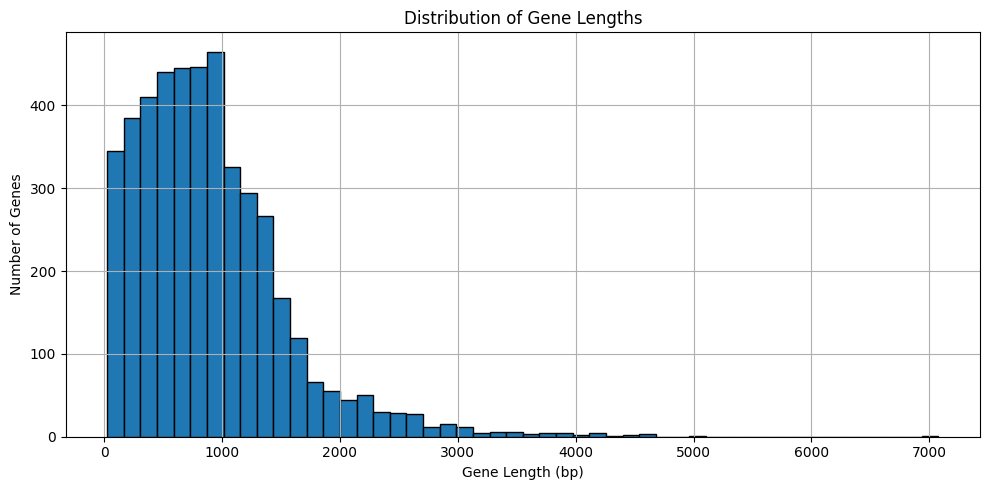

Shortest gene:
  ID      : gene-b4737
  Name    : ymdG
  Product : -
  Length  : 27 bp

Longest gene:
  ID      : gene-b1978
  Name    : yeeJ
  Product : -
  Length  : 7077 bp


In [ ]:
import matplotlib.pyplot as plt

def parse_gff(filepath):
    annotations = []
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if not line or line.startswith('#'):
                continue
            parts = line.split('\t')
            if len(parts) != 9:
                continue
            seqid, source, feature_type, start, end, score, strand, phase, attributes = parts
            attr_dict = {}
            for attr in attributes.split(';'):
                if '=' in attr:
                    key, value = attr.split('=', 1)
                    attr_dict[key] = value
            annotations.append({
                'seqid': seqid,
                'source': source,
                'type': feature_type,
                'start': int(start),
                'end': int(end),
                'score': score if score != '.' else None,
                'strand': strand,
                'phase': phase if phase != '.' else None,
                'attributes': attr_dict
            })
    return annotations

def plot_gene_lengths(gff_file):
    features = parse_gff(gff_file)
    genes = [f for f in features if f['type'] == 'gene']
    gene_lengths = [gene['end'] - gene['start'] + 1 for gene in genes]
    gene_ids = [gene['attributes'].get('ID', 'unknown') for gene in genes]

    # –ù–∞—Ö–æ–¥–∏–º —Å–∞–º—ã–π –∫–æ—Ä–æ—Ç–∫–∏–π –∏ —Å–∞–º—ã–π –¥–ª–∏–Ω–Ω—ã–π –≥–µ–Ω
    min_index = gene_lengths.index(min(gene_lengths))
    max_index = gene_lengths.index(max(gene_lengths))
    min_gene = {'id': gene_ids[min_index], 'length': gene_lengths[min_index]}
    max_gene = {'id': gene_ids[max_index], 'length': gene_lengths[max_index]}

    # –°—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É
    plt.figure(figsize=(10, 5))
    plt.hist(gene_lengths, bins=50, edgecolor='black')
    plt.title("Distribution of Gene Lengths")
    plt.xlabel("Gene Length (bp)")
    plt.ylabel("Number of Genes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # –í—ã–≤–æ–¥–∏–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
    print(f"Shortest gene: {min_gene['id']} ({min_gene['length']} bp)")
    print(f"Longest gene:  {max_gene['id']} ({max_gene['length']} bp)")


def plot_gene_lengths(gff_file):
    features = parse_gff(gff_file)
    genes = [f for f in features if f['type'] == 'gene']
    gene_lengths = [gene['end'] - gene['start'] + 1 for gene in genes]

    # –ü–æ–ª—É—á–∞–µ–º –¥–∞–Ω–Ω—ã–µ –¥–ª—è –ø–æ–¥–ø–∏—Å–∏
    def get_gene_info(gene):
        attrs = gene['attributes']
        return {
            'id': attrs.get('ID', 'unknown'),
            'gene': attrs.get('gene', '-'),
            'product': attrs.get('product', '-'),
            'length': gene['end'] - gene['start'] + 1
        }

    # –ù–∞—Ö–æ–¥–∏–º —Å–∞–º—ã–π –∫–æ—Ä–æ—Ç–∫–∏–π –∏ —Å–∞–º—ã–π –¥–ª–∏–Ω–Ω—ã–π
    min_index = gene_lengths.index(min(gene_lengths))
    max_index = gene_lengths.index(max(gene_lengths))
    min_gene = get_gene_info(genes[min_index])
    max_gene = get_gene_info(genes[max_index])

    # –°—Ç—Ä–æ–∏–º –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É
    plt.figure(figsize=(10, 5))
    plt.hist(gene_lengths, bins=50, edgecolor='black')
    plt.title("Distribution of Gene Lengths")
    plt.xlabel("Gene Length (bp)")
    plt.ylabel("Number of Genes")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # –ü–µ—á–∞—Ç–∞–µ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç
    print(f"Shortest gene:")
    print(f"  ID      : {min_gene['id']}")
    print(f"  Name    : {min_gene['gene']}")
    print(f"  Product : {min_gene['product']}")
    print(f"  Length  : {min_gene['length']} bp")

    print(f"\nLongest gene:")
    print(f"  ID      : {max_gene['id']}")
    print(f"  Name    : {max_gene['gene']}")
    print(f"  Product : {max_gene['product']}")
    print(f"  Length  : {max_gene['length']} bp")

# –ü—Ä–∏–º–µ—Ä –∑–∞–ø—É—Å–∫–∞
gff_path = "GCF_000005845.2_ASM584v2_genomic.gff"  # –∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –ø—É—Ç—å –∫ –≤–∞—à–µ–º—É GFF-—Ñ–∞–π–ª—É
plot_gene_lengths(gff_path)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/914/755/GCF_009914755.1_T2T-CHM13v2.0/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz

--2025-05-22 09:35:59--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/009/914/755/GCF_009914755.1_T2T-CHM13v2.0/GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.13, 130.14.250.31, 130.14.250.7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79063589 (75M) [application/x-gzip]
Saving to: ‚ÄòGCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz‚Äô

GCF_009914755.1_T2T 100%[===================>]  75.40M  20.4MB/s    in 4.9s    

2025-05-22 09:36:05 (15.4 MB/s) - ‚ÄòGCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz‚Äô saved [79063589/79063589]



In [ ]:
!gzip -d GCF_009914755.1_T2T-CHM13v2.0_genomic.gff.gz

In [ ]:
!ls -hlrt

total 1.6G
-rw-r--r-- 1 root root 4.5M Oct 31  2014  GCF_000005845.2_ASM584v2_genomic.fna
-rw-r--r-- 1 root root 2.6M Jun 18  2023  GCF_000005845.2_ASM584v2_genomic.gff
-rw-r--r-- 1 root root 1.6G Aug 27  2024  GCF_009914755.1_T2T-CHM13v2.0_genomic.gff
drwxr-xr-x 1 root root 4.0K May 14 13:38  sample_data
-rw-r--r-- 1 root root 8.2K May 22 09:03 '83338241991?pwd=4Olrrp0PMbmu5hroMecZ3BdsyvESZi.1'


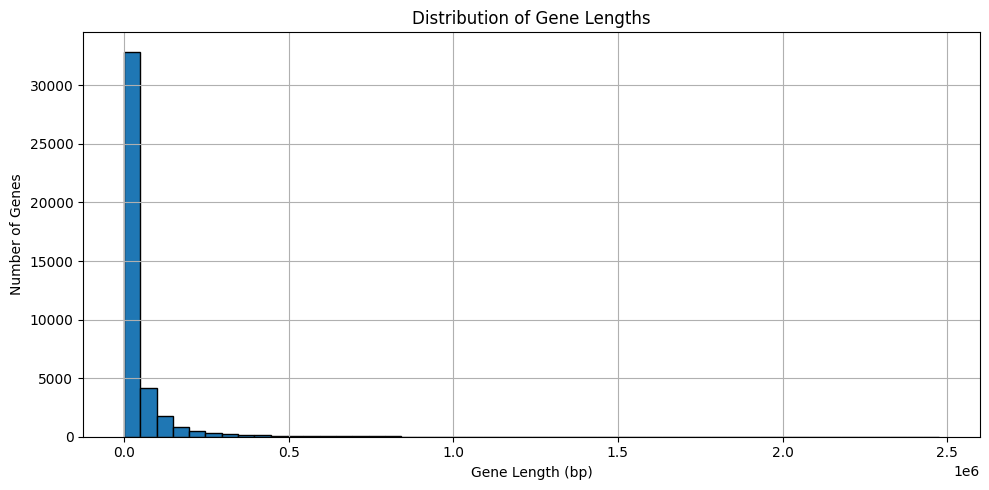

Shortest gene:
  ID      : gene-TRDD1
  Name    : TRDD1
  Product : -
  Length  : 8 bp

Longest gene:
  ID      : gene-RBFOX1
  Name    : RBFOX1
  Product : -
  Length  : 2475569 bp


In [ ]:
gff_path_human = "GCF_009914755.1_T2T-CHM13v2.0_genomic.gff"  # –∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –ø—É—Ç—å –∫ –≤–∞—à–µ–º—É GFF-—Ñ–∞–π–ª—É
plot_gene_lengths(gff_path_human)

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.gff.gz

--2025-05-22 09:42:31--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.gff.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 130.14.250.31, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77807126 (74M) [application/x-gzip]
Saving to: ‚ÄòGCF_000001405.40_GRCh38.p14_genomic.gff.gz‚Äô

GCF_000001405.40_GR 100%[===================>]  74.20M  18.0MB/s    in 5.5s    

2025-05-22 09:42:38 (13.4 MB/s) - ‚ÄòGCF_000001405.40_GRCh38.p14_genomic.gff.gz‚Äô saved [77807126/77807126]



In [ ]:
!gzip -d GCF_000001405.40_GRCh38.p14_genomic.gff.gz

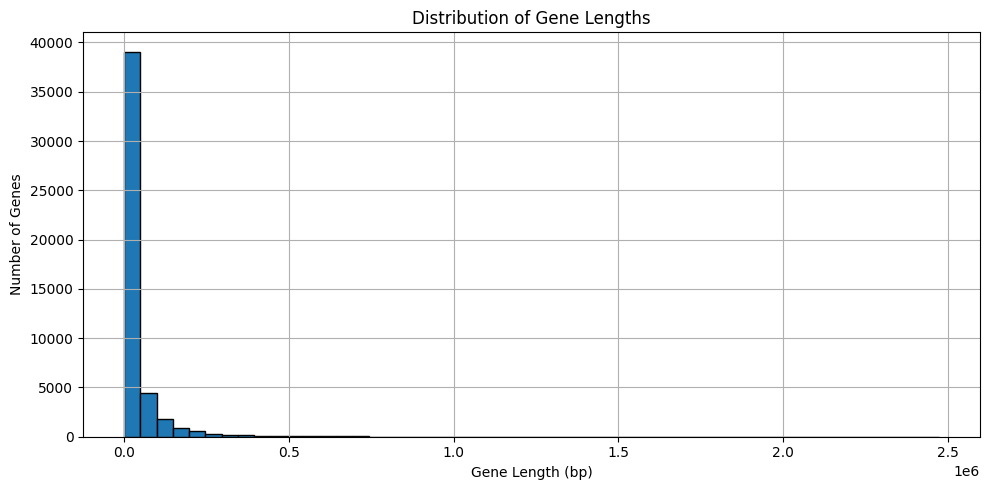

Shortest gene:
  ID      : gene-TRDD1
  Name    : TRDD1
  Product : -
  Length  : 8 bp

Longest gene:
  ID      : gene-RBFOX1
  Name    : RBFOX1
  Product : -
  Length  : 2473620 bp


In [ ]:
gff_path_human_ref = "GCF_000001405.40_GRCh38.p14_genomic.gff"  # –∑–∞–º–µ–Ω–∏—Ç–µ –Ω–∞ –ø—É—Ç—å –∫ –≤–∞—à–µ–º—É GFF-—Ñ–∞–π–ª—É
plot_gene_lengths(gff_path_human_ref)

In [ ]:
def find_orfs(sequence):
    start_codon = 'ATG'
    stop_codons = {'TAA', 'TAG', 'TGA'}
    sequence = sequence.upper()
    orfs = []

    for frame in range(3):  # —Ç—Ä–∏ –≤–æ–∑–º–æ–∂–Ω—ã—Ö —Ä–∞–º–∫–∏ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è
        i = frame
        while i + 3 <= len(sequence):
            codon = sequence[i:i+3]
            if codon == start_codon:
                # –Ω–∞—à–ª–∏ —Å—Ç–∞—Ä—Ç, –Ω–∞—á–∏–Ω–∞–µ–º –∏—Å–∫–∞—Ç—å —Å—Ç–æ–ø
                j = i + 3
                while j + 3 <= len(sequence):
                    next_codon = sequence[j:j+3]
                    if next_codon in stop_codons:
                        orf_seq = sequence[i:j+3]  # –≤–∫–ª—é—á–∞—è —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω
                        orfs.append(orf_seq)
                        break  # –Ω–∞—à–ª–∏ ORF ‚Äî –≤—ã—Ö–æ–¥–∏–º, –∏—â–µ–º —Å–ª–µ–¥—É—é—â–∏–π —Å—Ç–∞—Ä—Ç
                    j += 3
                i = j  # –º–æ–∂–Ω–æ –ø—Ä—ã–≥–Ω—É—Ç—å –∫ —Å—Ç–æ–ø—É
            else:
                i += 3
    return orfs

In [ ]:
def find_orfs_nn(sequence):
    sequence = sequence.upper()
    stop_codons = {"TAA", "TAG", "TGA"}
    orfs = []

    # –ü—Ä–æ–≤–µ—Ä–∫–∞ –ø–æ —Ç—Ä–µ–º —Ñ—Ä–µ–π–º–∞–º
    for frame in range(3):
        i = frame
        in_orf = False
        while i + 3 <= len(sequence):
            codon = sequence[i:i+3]
            if not in_orf:
                if codon == "ATG":
                    start = i
                    in_orf = True
            else:
                if codon in stop_codons:
                    end = i + 3
                    orfs.append((start, end, frame))
                    i = end - 3  # –ü—Ä–æ–¥–æ–ª–∂–∏–º –ø–æ–∏—Å–∫ –ø–æ—Å–ª–µ —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–∞
                    in_orf = False
            i += 3
    return orfs

# –ü—Ä–∏–º–µ—Ä
if __name__ == "__main__":
    genome = "TTGATGAAATGAAAAGTAGATGTTTTAGATGTAA"
    orfs = find_orfs_nn(genome)
    for start, end, frame in orfs:
        print(f"ORF: {start}-{end} (frame {frame}) => {genome[start:end]}")


ORF: 3-12 (frame 0) => ATGAAATGA
ORF: 19-28 (frame 1) => ATGTTTTAG
ORF: 28-34 (frame 1) => ATGTAA


In [ ]:
orfs_plus = find_orfs(sequence)
orfs_minus = find_orfs(reverse_complement(sequence))

In [ ]:
len(orfs_plus), len(orfs_minus)

(40954, 40733)

In [ ]:
orfs_plus_nn = find_orfs_nn(sequence)
orfs_minus_nn = find_orfs_nn(reverse_complement(sequence))
len(orfs_plus_nn), len(orfs_minus_nn)

(40954, 40733)

In [ ]:
orfs_plus[100]

'ATGCGACGCCGGTCGCGTCTTATCCGGCCTTCCTATATCAGGCTGTGTTTAAGACGCCGCCGCTTCGCCCAAATCCTTATGCCGGTTCGACGGCTGGACAAAATACTGTTTATCTTCCCAGCGCAGGCAGGTTAA'

In [ ]:
orfs_plus_nn[100]

'ATGCGACGCCGGTCGCGTCTTATCCGGCCTTCCTATATCAGGCTGTGTTTAAGACGCCGCCGCTTCGCCCAAATCCTTATGCCGGTTCGACGGCTGGACAAAATACTGTTTATCTTCCCAGCGCAGGCAGGTTAA'

In [ ]:
!wget https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz

--2025-05-22 10:09:42--  https://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/001/405/GCF_000001405.40_GRCh38.p14/GCF_000001405.40_GRCh38.p14_genomic.fna.gz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 130.14.250.10, 130.14.250.12, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 972898531 (928M) [application/x-gzip]
Saving to: ‚ÄòGCF_000001405.40_GRCh38.p14_genomic.fna.gz‚Äô

GCF_000001405.40_GR 100%[===================>] 927.83M  9.76MB/s    in 2m 27s  

2025-05-22 10:12:10 (6.29 MB/s) - ‚ÄòGCF_000001405.40_GRCh38.p14_genomic.fna.gz‚Äô saved [972898531/972898531]



In [ ]:
!gzip -d GCF_000001405.40_GRCh38.p14_genomic.gff.gz

gzip: GCF_000001405.40_GRCh38.p14_genomic.gff already exists; do you wish to overwrite (y or n)? ^C


In [ ]:
import csv
from collections import defaultdict

def parse_gff(file_path):
    genes = defaultdict(list)
    with open(file_path, 'r') as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            if row[0].startswith('#') or row[2] != 'gene':
                continue
            chrom = row[0]
            start = int(row[3])
            end = int(row[4])
            strand = row[6]
            genes[chrom].append((start, end, strand))
    return genes

def find_overlaps(genes):
    overlaps = []
    for chrom in genes:
        sorted_genes = sorted(genes[chrom], key=lambda x: x[0])
        for i in range(len(sorted_genes)):
            for j in range(i + 1, len(sorted_genes)):
                gene1 = sorted_genes[i]
                gene2 = sorted_genes[j]
                if gene2[0] <= gene1[1]:
                    overlaps.append((chrom, gene1, gene2))
                else:
                    break
    return overlaps

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
gff_file = 'GCF_000005845.2_ASM584v2_genomic.gff'
genes = parse_gff(gff_file)
overlapping_genes = find_overlaps(genes)

len(overlapping_genes)
# for overlap in overlapping_genes:
#     chrom, gene1, gene2 = overlap
#     print(f'Overlap on {chrom}: {gene1} and {gene2}')

784

In [ ]:
import collections

def find_orfs_bacterial(dna_sequence: str) -> list:
    """
    –ù–∞—Ö–æ–¥–∏—Ç –æ—Ç–∫—Ä—ã—Ç—ã–µ —Ä–∞–º–∫–∏ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è (–û–†–§) –≤ –≥–µ–Ω–æ–º–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –±–∞–∫—Ç–µ—Ä–∏–∏.

    –ö–æ–Ω—Ü–µ–ø—Ü–∏—è:
    1. –û–†–§—ã –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å –∫–æ–¥–æ–Ω–∞ –º–µ—Ç–∏–æ–Ω–∏–Ω–∞ (ATG).
    2. –û–†–§—ã –¥–æ–ª–∂–Ω—ã –Ω–∞—Ö–æ–¥–∏—Ç—å—Å—è –≤ –æ–¥–Ω–æ–π —Ä–∞–º–∫–µ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è.
    3. –û–†–§—ã –∑–∞–∫–∞–Ω—á–∏–≤–∞—é—Ç—Å—è –ø–µ—Ä–≤—ã–º –≤—Å—Ç—Ä–µ—á–µ–Ω–Ω—ã–º —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–æ–º (TAA, TAG, TGA)
       –≤ —Ç–æ–π –∂–µ —Ä–∞–º–∫–µ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è.
    4. –í–ª–æ–∂–µ–Ω–Ω—ã–µ –º–µ—Ç–∏–æ–Ω–∏–Ω—ã (ATG), –Ω–∞—Ö–æ–¥—è—â–∏–µ—Å—è –≤–Ω—É—Ç—Ä–∏ —É–∂–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω–æ–≥–æ –û–†–§–∞
       –∏ –≤ —Ç–æ–π –∂–µ —Ä–∞–º–∫–µ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è, –Ω–µ –Ω–∞—á–∏–Ω–∞—é—Ç –Ω–æ–≤—ã–π –û–†–§.
    5. –í–ª–æ–∂–µ–Ω–Ω—ã–µ –º–µ—Ç–∏–æ–Ω–∏–Ω—ã, –Ω–æ –≤ –¥—Ä—É–≥–æ–π —Ä–∞–º–∫–µ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è, –º–æ–≥—É—Ç –Ω–∞—á–∏–Ω–∞—Ç—å –Ω–æ–≤—ã–π –û–†–§.

    Args:
        dna_sequence (str): –°—Ç—Ä–æ–∫–∞ –î–ù–ö, —Å–æ—Å—Ç–æ—è—â–∞—è –∏–∑ —Å–∏–º–≤–æ–ª–æ–≤ 'A', 'T', 'G', 'C'.
                            –†–µ–≥–∏—Å—Ç—Ä –±—É–¥–µ—Ç –ø—Ä–∏–≤–µ–¥–µ–Ω –∫ –≤–µ—Ä—Ö–Ω–µ–º—É.

    Returns:
        list: –°–ø–∏—Å–æ–∫ —Å–ª–æ–≤–∞—Ä–µ–π, –≥–¥–µ –∫–∞–∂–¥—ã–π —Å–ª–æ–≤–∞—Ä—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –û–†–§ –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç:
              'start': –Ω–∞—á–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å –û–†–§–∞ (0-based) –≤ –∏—Å—Ö–æ–¥–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.
              'end': –∫–æ–Ω–µ—á–Ω—ã–π –∏–Ω–¥–µ–∫—Å –û–†–§–∞ (0-based, –Ω–µ –≤–∫–ª—é—á–∞—è —Å–∞–º –∫–æ–Ω–µ—á–Ω—ã–π –∏–Ω–¥–µ–∫—Å,
                     —Ç.–µ. –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —Å—Ä–µ–∑–∞ dna_sequence[start:end]).
              'frame': —Ä–∞–º–∫–∞ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è (1, 2 –∏–ª–∏ 3).
              'sequence': –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –î–ù–ö –û–†–§–∞ (–≤–∫–ª—é—á–∞—è —Å—Ç–∞—Ä—Ç- –∏ —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω—ã).
              'length': –¥–ª–∏–Ω–∞ –û–†–§–∞ –≤ –Ω—É–∫–ª–µ–æ—Ç–∏–¥–∞—Ö.
    """
    if not dna_sequence:
        return []

    dna_sequence = dna_sequence.upper()
    n = len(dna_sequence)

    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]

    found_orfs = []

    # –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —É–∂–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –û–†–§ –¥–ª—è –∫–∞–∂–¥–æ–π —Ä–∞–º–∫–∏.
    # –ö–ª—é—á: —Ä–∞–º–∫–∞ (0, 1, 2), –ó–Ω–∞—á–µ–Ω–∏–µ: —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ç–µ–∂–µ–π (start_abs_index, end_abs_index)
    # defaultdict –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞, —á—Ç–æ–±—ã –Ω–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–∞–ª–∏—á–∏–µ –∫–ª—é—á–∞ –ø–µ—Ä–µ–¥ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ–º.
    identified_orf_regions_by_frame = collections.defaultdict(list)

    # –ò—Ç–µ—Ä–∏—Ä—É–µ–º –ø–æ —Ç—Ä–µ–º –≤–æ–∑–º–æ–∂–Ω—ã–º —Ä–∞–º–∫–∞–º —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è (0, 1, 2)
    for frame_offset in range(3):

        # 1. –ù–∞—Ö–æ–¥–∏–º –≤—Å–µ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ —Å—Ç–∞—Ä—Ç–æ–≤—ã–µ –∫–æ–¥–æ–Ω—ã (ATG) –≤ —Ç–µ–∫—É—â–µ–π —Ä–∞–º–∫–µ
        potential_atg_indices_in_frame = []
        # –ò–¥–µ–º –ø–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Å —à–∞–≥–æ–º 3, –Ω–∞—á–∏–Ω–∞—è —Å —Ç–µ–∫—É—â–µ–≥–æ —Å–º–µ—â–µ–Ω–∏—è —Ä–∞–º–∫–∏ (frame_offset)
        # n - 2 –≥–∞—Ä–∞–Ω—Ç–∏—Ä—É–µ—Ç, —á—Ç–æ –º—ã –Ω–µ –≤—ã–π–¥–µ–º –∑–∞ –ø—Ä–µ–¥–µ–ª—ã —Å—Ç—Ä–æ–∫–∏ –ø—Ä–∏ –≤–∑—è—Ç–∏–∏ –∫–æ–¥–æ–Ω–∞ dna_sequence[i : i + 3]
        for i in range(frame_offset, n - 2, 3):
            codon = dna_sequence[i : i + 3]
            if codon == start_codon:
                potential_atg_indices_in_frame.append(i)

        # 2. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω–æ–≥–æ ATG –∏—â–µ–º –û–†–§
        for atg_start_index in potential_atg_indices_in_frame:

            # –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≤–ª–æ–∂–µ–Ω–Ω–æ—Å—Ç—å –≤ —Ç–æ–π –∂–µ —Ä–∞–º–∫–µ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è:
            # –ú–µ—Ç–∏–æ–Ω–∏–Ω (atg_start_index) —Å—á–∏—Ç–∞–µ—Ç—Å—è –≤–ª–æ–∂–µ–Ω–Ω—ã–º, –µ—Å–ª–∏ –µ–≥–æ –Ω–∞—á–∞–ª—å–Ω–∞—è –ø–æ–∑–∏—Ü–∏—è
            # –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤–Ω—É—Ç—Ä–∏ —É–∂–µ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –û–†–§–∞ (orf_s <= atg_start_index < orf_e).
            is_nested_in_same_frame = False
            for orf_s, orf_e in identified_orf_regions_by_frame[frame_offset]:
                if orf_s <= atg_start_index < orf_e:
                    is_nested_in_same_frame = True
                    break # –ù–∞—à–ª–∏ –≤–ª–æ–∂–µ–Ω–∏–µ, –¥–∞–ª—å—à–µ –ø—Ä–æ–≤–µ—Ä—è—Ç—å –Ω–µ –Ω—É–∂–Ω–æ

            if is_nested_in_same_frame:
                continue # –≠—Ç–æ—Ç ATG –≤–ª–æ–∂–µ–Ω –≤ –û–†–§ –≤ —Ç–æ–π –∂–µ —Ä–∞–º–∫–µ, –ø—Ä–æ–ø—É—Å–∫–∞–µ–º –µ–≥–æ

            # –ò—â–µ–º –ø–µ—Ä–≤—ã–π —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω, –Ω–∞—á–∏–Ω–∞—è —Å–æ —Å–ª–µ–¥—É—é—â–µ–≥–æ –∫–æ–¥–æ–Ω–∞ –ø–æ—Å–ª–µ ATG
            # –ü–æ–∏—Å–∫ —Ç–∞–∫–∂–µ –∏–¥–µ—Ç —Å —à–∞–≥–æ–º 3, –≤ —Ç–æ–π –∂–µ —Ä–∞–º–∫–µ —Å—á–∏—Ç—ã–≤–∞–Ω–∏—è
            for j in range(atg_start_index + 3, n - 2, 3):
                codon = dna_sequence[j : j + 3]
                if codon in stop_codons:
                    # –°—Ç–æ–ø-–∫–æ–¥–æ–Ω –Ω–∞–π–¥–µ–Ω. –û–ø—Ä–µ–¥–µ–ª—è–µ–º –∫–æ–Ω–µ—Ü –û–†–§–∞.
                    orf_end_index = j + 3 # –ö–æ–Ω–µ—á–Ω—ã–π –∏–Ω–¥–µ–∫—Å –¥–ª—è —Å—Ä–µ–∑–∞ (–Ω–µ –≤–∫–ª—é—á–∞—è —Å–∞–º —ç—Ç–æ—Ç –∏–Ω–¥–µ–∫—Å)

                    orf_info = {
                        "start": atg_start_index, # 0-based –Ω–∞—á–∞–ª—å–Ω—ã–π –∏–Ω–¥–µ–∫—Å
                        "end": orf_end_index,     # 0-based –∫–æ–Ω–µ—á–Ω—ã–π –∏–Ω–¥–µ–∫—Å (–¥–ª—è —Å—Ä–µ–∑–∞)
                        "frame": frame_offset + 1, # –†–∞–º–∫–∞ 1, 2 –∏–ª–∏ 3 –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
                        "sequence": dna_sequence[atg_start_index:orf_end_index],
                        "length": orf_end_index - atg_start_index
                    }
                    found_orfs.append(orf_info)

                    # –ó–∞–ø–æ–º–∏–Ω–∞–µ–º —Ä–µ–≥–∏–æ–Ω —ç—Ç–æ–≥–æ –û–†–§–∞ –¥–ª—è —Ç–µ–∫—É—â–µ–π —Ä–∞–º–∫–∏,
                    # —á—Ç–æ–±—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥—É—é—â–∏–µ ATG.
                    identified_orf_regions_by_frame[frame_offset].append((atg_start_index, orf_end_index))

                    # –û–†–§ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è –ø–µ—Ä–≤—ã–º –≤—Å—Ç—Ä–µ—á–µ–Ω–Ω—ã–º —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–æ–º,
                    # –ø–æ—ç—Ç–æ–º—É –ø—Ä–µ–∫—Ä–∞—â–∞–µ–º –ø–æ–∏—Å–∫ —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–æ–≤ –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ ATG.
                    break

            # –ï—Å–ª–∏ —Ü–∏–∫–ª –ø–æ j –∑–∞–≤–µ—Ä—à–∏–ª—Å—è –±–µ–∑ break, –∑–Ω–∞—á–∏—Ç —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω –Ω–µ –±—ã–ª –Ω–∞–π–¥–µ–Ω
            # –¥–ª—è —Ç–µ–∫—É—â–µ–≥–æ ATG –¥–æ –∫–æ–Ω—Ü–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –≤ —ç—Ç–æ–π —Ä–∞–º–∫–µ. –¢–∞–∫–æ–π –û–†–§ –Ω–µ–ø–æ–ª–Ω—ã–π –∏ –Ω–µ –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è.

    # –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ: –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å –Ω–∞–π–¥–µ–Ω–Ω—ã–µ –û–†–§—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ —Å—Ç–∞—Ä—Ç–æ–≤–æ–π –ø–æ–∑–∏—Ü–∏–∏ –∏ —Ä–∞–º–∫–µ.
    found_orfs.sort(key=lambda x: (x['start'], x['frame']))

    return found_orfs

In [ ]:
orf_plus_nn = find_orfs_bacterial(sequence)
orf_minus_nn = find_orfs_bacterial(reverse_complement(sequence))
total_orfs = orf_plus_nn + orf_minus_nn
len(orf_plus_nn), len(orf_minus_nn)

(40954, 40733)

In [ ]:
for x in orf_minus_nn[100:210]:
  print(x)

{'start': 9810, 'end': 9858, 'frame': 1, 'sequence': 'ATGCAAAATCTCTTTTGCTTCAGCTTCACGTCCGCGTTCCAGCAATAA', 'length': 48}
{'start': 10003, 'end': 10087, 'frame': 2, 'sequence': 'ATGGCGTCATCGCGCCATTTCGCCTGCTCGTCGGTGACATCGTTGCCCATCAAACGCCAGGCGACGATATCGCGCAGCTCCTGA', 'length': 84}
{'start': 10124, 'end': 10202, 'frame': 3, 'sequence': 'ATGGGATCATCAGCCGTGCATTCTCAGCATCCTGCCGCGCCACACTGGCAAACGCCACCGCCGCCATTTGACGGGTAA', 'length': 78}
{'start': 10264, 'end': 10291, 'frame': 2, 'sequence': 'ATGATTGCCGAGGCGATAGTCTGGTAA', 'length': 27}
{'start': 10949, 'end': 10970, 'frame': 3, 'sequence': 'ATGCAGCGTCATGCCGCGTAA', 'length': 21}
{'start': 10959, 'end': 11043, 'frame': 1, 'sequence': 'ATGCCGCGTAATAGATTTATGCTAACCAGTCATTGCCGTTTACGCCACGTTACGGACACTTTTTTACTTTTACTGCGAGGGTGA', 'length': 84}
{'start': 11151, 'end': 12798, 'frame': 1, 'sequence': 'ATGCATCGTGTCGGCAAAGTTGTTCCGCCGAAACGTCATATTTTGAAAAACATCTCTCTGAGTTTCTTCCCTGGGGCAAAAATTGGTGTCCTGGGTCTGAATGGCGCGGGTAAGTCCACCCTGCTGCGCATTATGGCGGGCATTGATAAAGACATCGAAGGTGAAG

In [ ]:
for x in orf_plus_nn[100:210]:
  print(x)

{'start': 12016, 'end': 12058, 'frame': 2, 'sequence': 'ATGACGTGGTTTACGACCCCATTTAGTAGTCAACCGCAGTGA', 'length': 42}
{'start': 12074, 'end': 12092, 'frame': 3, 'sequence': 'ATGAAATTGGGCAGTTGA', 'length': 18}
{'start': 12130, 'end': 12175, 'frame': 2, 'sequence': 'ATGATGACCGAATATATAGTGGAGACGTTTAGATGGGTAAAATAA', 'length': 45}
{'start': 12162, 'end': 14079, 'frame': 1, 'sequence': 'ATGGGTAAAATAATTGGTATCGACCTGGGTACTACCAACTCTTGTGTAGCGATTATGGATGGCACCACTCCTCGCGTGCTGGAGAACGCCGAAGGCGATCGCACCACGCCTTCTATCATTGCCTATACCCAGGATGGTGAAACTCTAGTTGGTCAGCCGGCTAAACGTCAGGCAGTGACGAACCCGCAAAACACTCTGTTTGCGATTAAACGCCTGATTGGTCGCCGCTTCCAGGACGAAGAAGTACAGCGTGATGTTTCCATCATGCCGTTCAAAATTATTGCTGCTGATAACGGCGACGCATGGGTCGAAGTTAAAGGCCAGAAAATGGCACCGCCGCAGATTTCTGCTGAAGTGCTGAAAAAAATGAAGAAAACCGCTGAAGATTACCTGGGTGAACCGGTAACTGAAGCTGTTATCACCGTACCGGCATACTTTAACGATGCTCAGCGTCAGGCAACCAAAGACGCAGGCCGTATCGCTGGTCTGGAAGTAAAACGTATCATCAACGAACCGACCGCAGCTGCGCTGGCTTACGGTCTGGACAAAGGCACTGGCAACCGTACTATCGCGGTTTATGACCTGGGTGGTGGTACTTTCGATATTTCTATTATCGAAAT

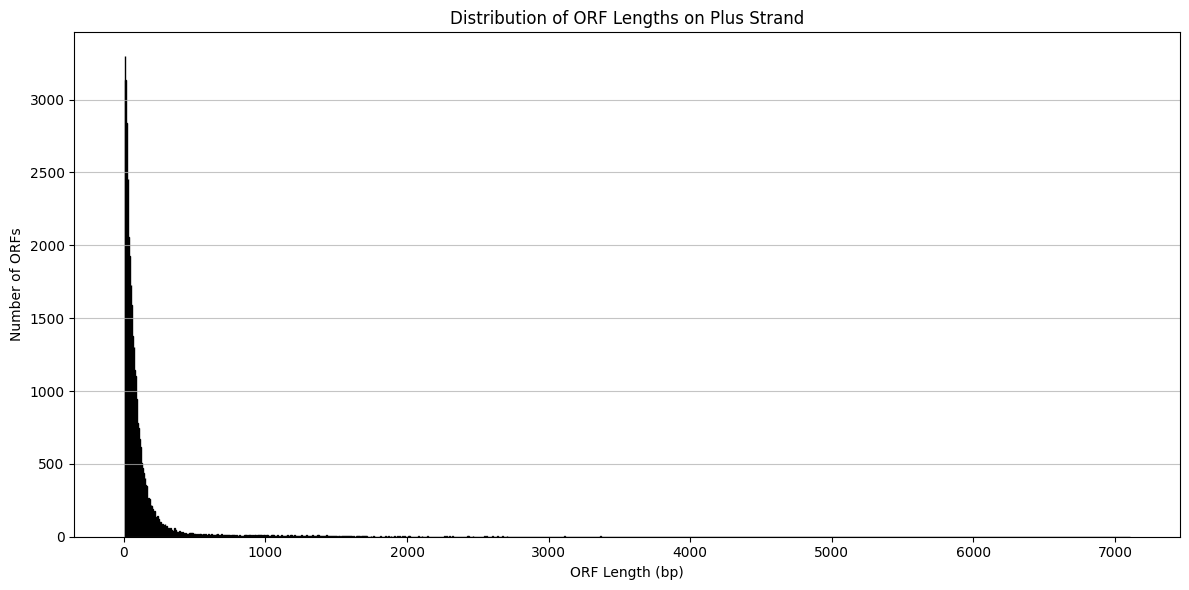

Total number of ORFs: 40954
Shortest ORF length: 6 bp
Longest ORF length:  7104 bp
Average ORF length:  123.74 bp


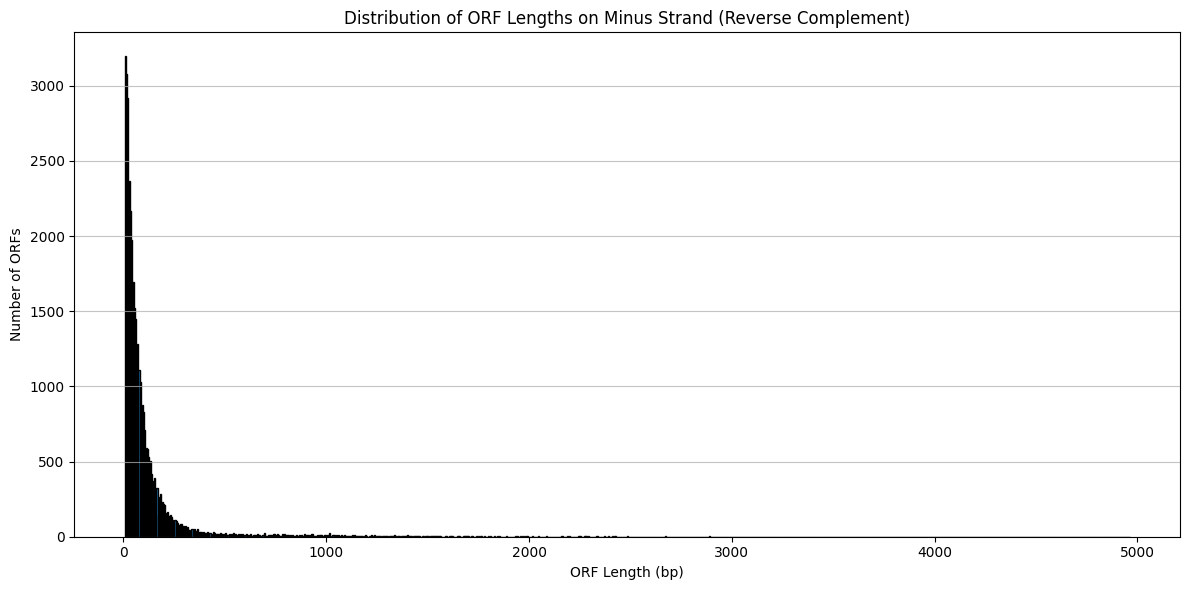

Total number of ORFs: 40733
Shortest ORF length: 6 bp
Longest ORF length:  4962 bp
Average ORF length:  125.70 bp


In [ ]:
# prompt: –∞ –º—ã –º–æ–∂–µ–º —Ä–∞—Å–ø—Ä–¥–µ–ª–µ–Ω–∏–µ –¥–ª–∏–Ω –Ω–∞—Ä–∏—Å–æ–≤–∞—Ç—å –¥–ª—è orf_plus_nn

def plot_orf_length_distribution(orfs_list, title="Distribution of ORF Lengths"):
    """
    –°—Ç—Ä–æ–∏—Ç –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª–∏–Ω –û–†–§.

    Args:
        orfs_list (list): –°–ø–∏—Å–æ–∫ —Å–ª–æ–≤–∞—Ä–µ–π, –≥–¥–µ –∫–∞–∂–¥—ã–π —Å–ª–æ–≤–∞—Ä—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –û–†–§
                          –∏ —Å–æ–¥–µ—Ä–∂–∏—Ç –∫–ª—é—á 'length'.
        title (str): –ó–∞–≥–æ–ª–æ–≤–æ–∫ –¥–ª—è –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã.
    """
    if not orfs_list:
        print(f"No ORFs found to plot distribution for: {title}")
        return

    orf_lengths = [orf['length'] for orf in orfs_list]

    # –ù–∞—Ö–æ–¥–∏–º —Å–∞–º—ã–π –∫–æ—Ä–æ—Ç–∫–∏–π –∏ —Å–∞–º—ã–π –¥–ª–∏–Ω–Ω—ã–π –û–†–§ –¥–ª—è –≤—ã–≤–æ–¥–∞
    min_length = min(orf_lengths) if orf_lengths else 0
    max_length = max(orf_lengths) if orf_lengths else 0

    plt.figure(figsize=(12, 6))
    # –ê–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –≤—ã–±–∏—Ä–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –±–∏–Ω–æ–≤, —á—Ç–æ–±—ã –±—ã–ª–æ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–µ—Ç–∞–ª–µ–π
    plt.hist(orf_lengths, bins='auto', edgecolor='black')
    plt.title(title)
    plt.xlabel("ORF Length (bp)")
    plt.ylabel("Number of ORFs")
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

    print(f"Total number of ORFs: {len(orf_lengths)}")
    print(f"Shortest ORF length: {min_length} bp")
    print(f"Longest ORF length:  {max_length} bp")
    if orf_lengths:
      print(f"Average ORF length:  {sum(orf_lengths) / len(orf_lengths):.2f} bp")


# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–ª—è orf_plus_nn
plot_orf_length_distribution(orf_plus_nn, title="Distribution of ORF Lengths on Plus Strand")

# –ï—Å–ª–∏ –≤–∞–º –Ω—É–∂–Ω–æ –ø–æ—Å—Ç—Ä–æ–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –¥–ª—è orfs_minus_nn —Ç–æ–∂–µ
orf_minus_nn = find_orfs_bacterial(reverse_complement(sequence))
plot_orf_length_distribution(orf_minus_nn, title="Distribution of ORF Lengths on Minus Strand (Reverse Complement)")


In [ ]:
!pip install Bio

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 321.1/321.1 kB 6.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.3/3.3 MB 33.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 46.7/46.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import csv

def extract_orfs_from_gff(gff_file, fasta_file):
    # –°—á–∏—Ç—ã–≤–∞–µ–º –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
    seq_dict = SeqIO.to_dict(SeqIO.parse(fasta_file, "fasta"))
    orfs = []

    with open(gff_file, 'r') as f:
        reader = csv.reader(f, delimiter='\t')
        for row in reader:
            if row[0].startswith('#') or row[2] != 'gene':
                continue
            chrom = row[0]
            start = int(row[3])-1
            end = int(row[4])
            strand = row[6]

            sequence = seq_dict[chrom].seq[start:end]  # GFF is 0-based
            if strand == '-':
                continue
                sequence = sequence.reverse_complement()

            frame = (start - 1) % 3
            orfs.append({
                'start': start,
                'end': end,
                'frame': frame,
                'sequence': str(sequence),
                'length': end - start + 1
            })

    return orfs

# –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
gff_file = "GCF_000005845.2_ASM584v2_genomic.gff"
fasta_file = "GCF_000005845.2_ASM584v2_genomic.fna"
reference_orfs = extract_orfs_from_gff(gff_file, fasta_file)

for orf in reference_orfs[:15]:
    print(orf)

{'start': 189, 'end': 255, 'frame': 2, 'sequence': 'ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA', 'length': 67}
{'start': 336, 'end': 2799, 'frame': 2, 'sequence': 'ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCCGCGTCAGGTGCCCGATGCGAGGTTGTTGAAGTCGATGTCCTACCAGGAAGCGATGGAGCTTTCCTACTTCGGCGCTAAAGTTCTTCACCCCCGCACCATTAC

In [ ]:
len(reference_orfs), len(orf_plus_nn)

(2209, 40954)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd

def orfs_to_intervals(orfs):
    return [(orf['start'], orf['end']) for orf in orfs]

def match_orfs(predicted, truth, tolerance=0):
    pred_intervals = orfs_to_intervals(predicted)
    true_intervals = orfs_to_intervals(truth)
    matched_true = set()
    tp = 0
    fp = 0

    for p in pred_intervals:
        found = False
        for idx, t in enumerate(true_intervals):
            if idx in matched_true:
                continue
            # –î–æ–ø—É—Å–∫–∞–µ–º –ø–æ–≥—Ä–µ—à–Ω–æ—Å—Ç—å (–Ω–∞–ø—Ä–∏–º–µ—Ä, +/- 3 –Ω—É–∫–ª–µ–æ—Ç–∏–¥–∞)
            if abs(p[0] - t[0]) <= tolerance and abs(p[1] - t[1]) <= tolerance:
                tp += 1
                matched_true.add(idx)
                found = True
                break
        if not found:
            fp += 1

    fn = len(true_intervals) - len(matched_true)
    return tp, fp, fn

def compute_metrics(tp, fp, fn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall    = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1        = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    accuracy  = tp / (tp + fp + fn) if (tp + fp + fn) > 0 else 0.0
    return {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'Accuracy': round(accuracy, 4),
        'Precision': round(precision, 4),
        'Recall': round(recall, 4),
        'F1 Score': round(f1, 4),
    }

def print_metrics_table(metrics):
    df = pd.DataFrame([metrics])
    print(df.to_string(index=False))

# üì¶ –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è
# orfs1 = [...]  # –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
# orfs2 = [...]  # –∏—Å—Ç–∏–Ω–Ω—ã–µ ORF'—ã

# –ü—Ä–∏–º–µ—Ä:
# orfs1 = [{'start': 100, 'end': 200}, {'start': 300, 'end': 400}]
# orfs2 = [{'start': 100, 'end': 200}, {'start': 500, 'end': 600}]

def evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=0):
    tp, fp, fn = match_orfs(orf_plus_nn, reference_orfs, tolerance)
    metrics = compute_metrics(tp, fp, fn)
    print_metrics_table(metrics)

In [ ]:
evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=0)

 TP    FP   FN  Accuracy  Precision  Recall  F1 Score
  0 40954 2209       0.0        0.0     0.0       0.0


In [ ]:
evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=5)

  TP    FP  FN  Accuracy  Precision  Recall  F1 Score
1590 39364 619    0.0382     0.0388  0.7198    0.0737


In [ ]:
evaluate_datasets(orf_plus_nn, reference_orfs, tolerance=0)

  TP    FP  FN  Accuracy  Precision  Recall  F1 Score
1569 39385 640    0.0377     0.0383  0.7103    0.0727


In [ ]:
len(orf_plus_nn)

40954

In [ ]:
for x in orf_plus_nn[:100]:
  print(x)

{'start': 29, 'end': 98, 'frame': 3, 'sequence': 'ATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAA', 'length': 69}
{'start': 189, 'end': 255, 'frame': 1, 'sequence': 'ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA', 'length': 66}
{'start': 336, 'end': 2799, 'frame': 1, 'sequence': 'ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTT

In [ ]:
orf_plus_filtered_nn = [x for x in orf_plus_nn if x["length"] > 5 * 3]

In [ ]:
len(orf_plus_filtered_nn)

34519

In [ ]:
evaluate_datasets(orf_plus_filtered_nn, reference_orfs, tolerance=0)

  TP    FP  FN  Accuracy  Precision  Recall  F1 Score
1569 32950 640    0.0446     0.0455  0.7103    0.0854


In [ ]:
#   TP    FP  FN  Accuracy  Precision  Recall  F1 Score
# 1569 39385 640    0.0377     0.0383  0.7103    0.0727
# 1569 32950 640    0.0446     0.0455  0.7103    0.0854
# 1557 17281 652    0.0799     0.0827  0.7048     0.148


In [ ]:
def tag_orfs(predicted, truth, tolerance=0):
    pred_intervals = [(p['start'], p['end']) for p in predicted]
    true_intervals = [(t['start'], t['end']) for t in truth]

    matched_pred = set()
    matched_true = set()

    tagged_pred = []
    tagged_true = []

    for i, p in enumerate(pred_intervals):
        matched = False
        for j, t in enumerate(true_intervals):
            if j in matched_true:
                continue
            if abs(p[0] - t[0]) <= tolerance and abs(p[1] - t[1]) <= tolerance:
                matched_pred.add(i)
                matched_true.add(j)
                matched = True
                break
        tag = 'TP' if matched else 'FP'
        tagged_pred.append({**predicted[i], 'type': tag})

    for j, t in enumerate(true_intervals):
        tag = 'TP' if j in matched_true else 'FN'
        tagged_true.append({**truth[j], 'type': tag})

    return tagged_pred, tagged_true

In [ ]:
predicted_tagged, true_tagged = tag_orfs(orf_plus_filtered_nn, reference_orfs, tolerance=0)

# –ü—Ä–∏–º–µ—Ä –≤—ã–≤–æ–¥–∞
import pandas as pd

df_pred = pd.DataFrame(predicted_tagged)
df_true = pd.DataFrame(true_tagged)

print("–ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è:")
print(df_pred[['start', 'end', 'type']].to_string(index=False))

print("\n–ò—Å—Ç–∏–Ω–∞:")
print(df_true[['start', 'end', 'type']].to_string(index=False))

Streaming output truncated to the last 5000 lines.
4278478 4279828   TP
4278986 4279031   FP
4279187 4279208   FP
4279289 4279376   FP
4279556 4279577   FP
4279637 4279679   FP
4279749 4279896   FP
4279805 4279937   FP
4279858 4280137   FP
4279979 4281629   TP
4280124 4280154   FP
4280184 4280319   FP
4280358 4280439   FP
4280442 4280469   FP
4280625 4280682   FP
4281138 4281222   FP
4281435 4281612   FP
4281715 4281802   FP
4281830 4281854   FP
4281863 4281899   FP
4281921 4281999   FP
4282217 4282235   FP
4282279 4282360   FP
4282397 4282415   FP
4282411 4282510   FP
4282497 4282539   FP
4282676 4282718   FP
4282808 4282847   FP
4282846 4282918   FP
4282901 4282946   FP
4282955 4282979   FP
4283161 4283179   FP
4283183 4283345   FP
4283196 4283256   FP
4283370 4283439   FP
4283562 4283628   FP
4283747 4283822   FP
4283761 4283803   FP
4283877 4283979   FP
4283897 4284593   FP
4284060 4284360   FP
4284552 4284588   FP
4284637 4284694   FP
4284756 4284936   FP
4284916 4285090   FP
4285

In [ ]:
def print_errors_only(tagged_predicted, tagged_truth):
    print("\n–û—à–∏–±–∫–∏ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è—Ö (FP):")
    for orf in tagged_predicted:
        if orf['type'] != 'TP':
            print(f"END: {orf['end']} | TYPE: {orf['type']} | SEQUENCE: {orf['sequence']}")

    print("\n–ü—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –≥–µ–Ω—ã (FN):")
    for orf in tagged_truth:
        if orf['type'] != 'TP':
            print(f"END: {orf['end']} | TYPE: {orf['type']} | SEQUENCE: {orf['sequence']}")

In [ ]:
predicted_tagged, truth_tagged = tag_orfs(orf_plus_filtered_nn, reference_orfs, tolerance=0)
print_errors_only(predicted_tagged, truth_tagged)

In [ ]:
def tag_orfs_with_start_stop_analysis(predicted, truth):
    matched_true = set()
    tagged_pred = []
    tagged_true = []

    for i, p in enumerate(predicted):
        match_type = 'FP'
        for j, t in enumerate(truth):
            if j in matched_true:
                continue

            match_start = p['start'] == t['start']
            match_end = p['end'] == t['end']

            if match_start and match_end:
                matched_true.add(j)
                match_type = 'TP-full'
                break
            elif match_start:
                matched_true.add(j)
                match_type = 'TP-start'
                break
            elif match_end:
                matched_true.add(j)
                match_type = 'TP-end'
                break

        tagged_pred.append({**p, 'type': match_type})

    for j, t in enumerate(truth):
        tag = 'FN' if j not in matched_true else 'TP'
        tagged_true.append({**t, 'type': tag})

    return tagged_pred, tagged_true

In [ ]:
from collections import Counter

def summarize_start_stop_errors(tagged_pred):
    counter = Counter([orf['type'] for orf in tagged_pred])
    print("\n–ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫ –ø–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è–º:")
    for key in ['TP-full', 'TP-start', 'TP-end', 'FP']:
        print(f"{key}: {counter.get(key, 0)}")

In [ ]:
predicted_tagged, true_tagged = tag_orfs_with_start_stop_analysis(orf_plus_filtered_nn, reference_orfs)
summarize_start_stop_errors(predicted_tagged)


–ê–Ω–∞–ª–∏–∑ –æ—à–∏–±–æ–∫ –ø–æ —Å–æ–≤–ø–∞–¥–µ–Ω–∏—è–º:
TP-full: 1569
TP-start: 1
TP-end: 505
FP: 32444


In [ ]:
import collections
import statistics
import re # –ú–æ–∂–µ—Ç –ø–æ–Ω–∞–¥–æ–±–∏—Ç—å—Å—è –¥–ª—è –±–æ–ª–µ–µ —Å–ª–æ–∂–Ω—ã—Ö –æ–ø–µ—Ä–∞—Ü–∏–π —Å –º–æ—Ç–∏–≤–∞–º–∏, –ø–æ–∫–∞ –Ω–µ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –∞–∫—Ç–∏–≤–Ω–æ

# --- –í—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ —Ñ—É–Ω–∫—Ü–∏–∏ ---

def read_fasta(filepath: str) -> dict:
    """
    –ß–∏—Ç–∞–µ—Ç FASTA —Ñ–∞–π–ª –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Å–ª–æ–≤–∞—Ä—å {–∑–∞–≥–æ–ª–æ–≤–æ–∫: –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å}.
    –ó–∞–≥–æ–ª–æ–≤–∫–æ–º —Å—á–∏—Ç–∞–µ—Ç—Å—è –ø–µ—Ä–≤–∞—è —á–∞—Å—Ç—å –¥–æ –ø—Ä–æ–±–µ–ª–∞. –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –ø—Ä–∏–≤–æ–¥—è—Ç—Å—è –∫ –≤–µ—Ä—Ö–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É.
    """
    sequences = {}
    current_seq_header = None
    current_seq_list = []
    try:
        with open(filepath, 'r') as f:
            for line in f:
                line = line.strip()
                if not line: # –ü—Ä–æ–ø—É—Å–∫–∞–µ–º –ø—É—Å—Ç—ã–µ —Å—Ç—Ä–æ–∫–∏
                    continue
                if line.startswith(">"):
                    if current_seq_header: # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø—Ä–µ–¥—ã–¥—É—â—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å
                        sequences[current_seq_header] = "".join(current_seq_list)
                    current_seq_header = line[1:].split()[0] # –ë–µ—Ä–µ–º ID –¥–æ –ø–µ—Ä–≤–æ–≥–æ –ø—Ä–æ–±–µ–ª–∞
                    current_seq_list = []
                else:
                    if current_seq_header: # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –∑–∞–≥–æ–ª–æ–≤–æ–∫ —É–∂–µ –±—ã–ª
                        current_seq_list.append(line.upper()) # –ü—Ä–∏–≤–æ–¥–∏–º –∫ –≤–µ—Ä—Ö–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
        if current_seq_header: # –°–æ—Ö—Ä–∞–Ω—è–µ–º –ø–æ—Å–ª–µ–¥–Ω—é—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤ —Ñ–∞–π–ª–µ
            sequences[current_seq_header] = "".join(current_seq_list)
    except FileNotFoundError:
        print(f"–û—à–∏–±–∫–∞: –§–∞–π–ª {filepath} –Ω–µ –Ω–∞–π–¥–µ–Ω.")
        raise # –ü–µ—Ä–µ–¥–∞–µ–º –∏—Å–∫–ª—é—á–µ–Ω–∏–µ –¥–∞–ª—å—à–µ
    if not sequences:
        print(f"–ü—Ä–µ–¥—É–ø—Ä–µ–∂–¥–µ–Ω–∏–µ: –§–∞–π–ª {filepath} –ø—É—Å—Ç –∏–ª–∏ –Ω–µ —Å–æ–¥–µ—Ä–∂–∏—Ç –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –≤ —Ñ–æ—Ä–º–∞—Ç–µ FASTA.")
    return sequences

def reverse_complement(dna_seq: str) -> str:
    """–í—ã—á–∏—Å–ª—è–µ—Ç –æ–±—Ä–∞—Ç–Ω—É—é –∫–æ–º–ø–ª–µ–º–µ–Ω—Ç–∞—Ä–Ω—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –î–ù–ö."""
    if not isinstance(dna_seq, str):
        raise TypeError("Input sequence must be a string.")
    # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –≤ –≤–µ—Ä—Ö–Ω–µ–º —Ä–µ–≥–∏—Å—Ç—Ä–µ –ø–µ—Ä–µ–¥ —Ç—Ä–∞–Ω—Å–ª—è—Ü–∏–µ–π
    complement_map = str.maketrans("ATGC", "TACG")
    return dna_seq.upper().translate(complement_map)[::-1]

# --- –§—É–Ω–∫—Ü–∏—è –æ–±—É—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ ---

def train_orf_parameters(
    gff_filepath: str,
    reference_fasta_filepath: str,
    candidate_sd_motifs: list,
    sd_upstream_window_rel_to_atg: tuple = (-15, -4) # (-15 –¥–æ -5 –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ)
) -> dict:
    """
    –í—ã—á–∏—Å–ª—è–µ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –û–†–§–æ–≤ –Ω–∞ –æ—Å–Ω–æ–≤–µ —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω–æ–≥–æ GFF –∏ –≥–µ–Ω–æ–º–∞.

    Args:
        gff_filepath: –ü—É—Ç—å –∫ GFF3 —Ñ–∞–π–ª—É.
        reference_fasta_filepath: –ü—É—Ç—å –∫ FASTA —Ñ–∞–π–ª—É —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω–æ–≥–æ –≥–µ–Ω–æ–º–∞.
        candidate_sd_motifs: –°–ø–∏—Å–æ–∫ –ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º—ã—Ö SD-–º–æ—Ç–∏–≤–æ–≤ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, ["AGGAGG", "AAGGAG"]).
        sd_upstream_window_rel_to_atg: –ö–æ—Ä—Ç–µ–∂ (—Å—Ç–∞—Ä—Ç, –∫–æ–Ω–µ—Ü_–Ω–µ_–≤–∫–ª—é—á–∞—è) –æ–ø—Ä–µ–¥–µ–ª—è—é—â–∏–π –æ–∫–Ω–æ
                                      –ø–µ—Ä–µ–¥ 'A' –∫–æ–¥–æ–Ω–∞ ATG (A=0) –¥–ª—è –ø–æ–∏—Å–∫–∞ SD-–º–æ—Ç–∏–≤–æ–≤.
                                      –ù–∞–ø—Ä–∏–º–µ—Ä, (-15, -4) –æ–∑–Ω–∞—á–∞–µ—Ç —Å -15 –ø.–Ω. (–≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ) –¥–æ -4 –ø.–Ω. (–Ω–µ –≤–∫–ª—é—á–∞—è).
    Returns:
        –°–ª–æ–≤–∞—Ä—å —Å –Ω–∞—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∏–ª–∏ –ø—É—Å—Ç–æ–π —Å–ª–æ–≤–∞—Ä—å –ø—Ä–∏ –æ—à–∏–±–∫–µ.
    """
    print(f"–ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –û–†–§ –∏–∑ {gff_filepath} –∏ {reference_fasta_filepath}...")

    try:
        reference_genome_dict = read_fasta(reference_fasta_filepath)
        if not reference_genome_dict:
            print(f"–û—à–∏–±–∫–∞: –ù–µ —É–¥–∞–ª–æ—Å—å –ø—Ä–æ—á–∏—Ç–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∏–∑ {reference_fasta_filepath}.")
            return {}
    except FileNotFoundError:
        # read_fasta —É–∂–µ –ø–µ—á–∞—Ç–∞–µ—Ç —Å–æ–æ–±—â–µ–Ω–∏–µ, –º–æ–∂–Ω–æ –ø—Ä–æ—Å—Ç–æ –≤–µ—Ä–Ω—É—Ç—å –ø—É—Å—Ç–æ–π —Å–ª–æ–≤–∞—Ä—å
        return {}

    all_ref_cds_sequences_oriented = []

    print("–ü–∞—Ä—Å–∏–Ω–≥ GFF –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è CDS –ø—Ä–∏–∑–Ω–∞–∫–æ–≤...")
    cds_found_in_gff_total = 0
    cds_processed_valid = 0
    skipped_stats = collections.defaultdict(int)

    try:
        with open(gff_filepath, 'r') as f_gff:
            for line_num, line in enumerate(f_gff, 1):
                if line.startswith("#") or not line.strip():
                    continue
                parts = line.strip().split('\t')
                if len(parts) < 9:
                    skipped_stats['invalid_gff_line_format'] +=1
                    continue

                feature_type = parts[2]
                if feature_type.upper() == 'CDS':
                    cds_found_in_gff_total += 1
                    seq_id = parts[0]
                    try:
                        gff_start_1based = int(parts[3])
                        gff_end_1based = int(parts[4])
                    except ValueError:
                        skipped_stats['invalid_cds_coordinates'] +=1
                        continue

                    strand = parts[6]
                    if strand not in ['+', '-']:
                        skipped_stats['invalid_cds_strand'] +=1
                        continue

                    if seq_id not in reference_genome_dict:
                        skipped_stats['seq_id_not_in_fasta'] +=1
                        continue

                    contig_sequence = reference_genome_dict[seq_id]
                    contig_len = len(contig_sequence)

                    cds_genomic_start_0based = gff_start_1based - 1
                    cds_genomic_end_0based_exclusive = gff_end_1based

                    if not (0 <= cds_genomic_start_0based < cds_genomic_end_0based_exclusive <= contig_len):
                        skipped_stats['cds_coords_out_of_bounds'] +=1
                        continue

                    cds_fragment_on_contig = contig_sequence[cds_genomic_start_0based : cds_genomic_end_0based_exclusive]

                    oriented_cds_sequence = cds_fragment_on_contig
                    if strand == '-':
                        oriented_cds_sequence = reverse_complement(cds_fragment_on_contig)

                    if not oriented_cds_sequence.startswith("ATG"):
                        skipped_stats['cds_not_starting_ATG'] +=1
                        continue
                    if len(oriented_cds_sequence) % 3 != 0:
                        skipped_stats['cds_len_not_multiple_of_3'] +=1
                        continue
                    stop_codon = oriented_cds_sequence[-3:]
                    if stop_codon not in ["TAA", "TAG", "TGA"]:
                        skipped_stats['cds_no_standard_stop'] +=1
                        continue

                    all_ref_cds_sequences_oriented.append(oriented_cds_sequence)
                    cds_processed_valid +=1
    except FileNotFoundError:
        print(f"–û—à–∏–±–∫–∞: GFF —Ñ–∞–π–ª {gff_filepath} –Ω–µ –Ω–∞–π–¥–µ–Ω.")
        return {} # –í–æ–∑–≤—Ä–∞—â–∞–µ–º –ø—É—Å—Ç–æ–π —Å–ª–æ–≤–∞—Ä—å
    except Exception as e:
        print(f"–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞ –ø—Ä–∏ —á—Ç–µ–Ω–∏–∏ GFF —Ñ–∞–π–ª–∞ {gff_filepath}: {e}")
        return {}


    print(f"  –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ CDS –∑–∞–ø–∏—Å–µ–π –≤ GFF: {cds_found_in_gff_total}")
    for reason, count in skipped_stats.items():
        print(f"  –ü—Ä–æ–ø—É—â–µ–Ω–æ CDS –ø–æ –ø—Ä–∏—á–∏–Ω–µ '{reason}': {count}")
    print(f"  –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è {cds_processed_valid} –≤–∞–ª–∏–¥–Ω—ã—Ö —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω—ã—Ö CDS –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.")

    if not all_ref_cds_sequences_oriented:
        print("–û—à–∏–±–∫–∞: –ù–µ –Ω–∞–π–¥–µ–Ω–æ –≤–∞–ª–∏–¥–Ω—ã—Ö CDS –≤ GFF –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ GFF, FASTA –∏ –∏—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ.")
        return {}

    all_codons_for_stats = []
    gc1_vals, gc2_vals, gc3_vals = [], [], []

    for cds_seq in all_ref_cds_sequences_oriented:
        # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–æ–¥–æ–Ω—ã, –∏—Å–∫–ª—é—á–∞—è —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω, –¥–ª—è —Ç–∞–±–ª–∏—Ü —á–∞—Å—Ç–æ—Ç –∏ GC-—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
        # –°—Ç–∞—Ä—Ç-–∫–æ–¥–æ–Ω (ATG) –≤–∫–ª—é—á–∞–µ—Ç—Å—è –≤ –∞–Ω–∞–ª–∏–∑ –∫–æ–¥–æ–Ω–æ–≤
        for i in range(0, len(cds_seq) - 3, 3): # -3 —á—Ç–æ–±—ã –∏—Å–∫–ª—é—á–∏—Ç—å —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω
            codon = cds_seq[i:i+3]
            all_codons_for_stats.append(codon)

            gc1_vals.append(1 if codon[0] in 'GC' else 0)
            gc2_vals.append(1 if codon[1] in 'GC' else 0)
            gc3_vals.append(1 if codon[2] in 'GC' else 0)

    if not all_codons_for_stats: # –î–æ–ª–∂–Ω–æ –±—ã—Ç—å –∏–∑–±—ã—Ç–æ—á–Ω—ã–º, –µ—Å–ª–∏ all_ref_cds_sequences_oriented –Ω–µ –ø—É—Å—Ç
        print("–û—à–∏–±–∫–∞: –ù–µ —É–¥–∞–ª–æ—Å—å –∏–∑–≤–ª–µ—á—å –∫–æ–¥–æ–Ω—ã –∏–∑ —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω—ã—Ö CDS. –û–±—É—á–µ–Ω–∏–µ –Ω–µ–≤–æ–∑–º–æ–∂–Ω–æ.")
        return {}

    codon_counts = collections.Counter(all_codons_for_stats)
    total_valid_codons = sum(codon_counts.values())
    codon_frequencies_ref = {c: count / total_valid_codons for c, count in codon_counts.items()}

    mean_gc3_ref = statistics.mean(gc3_vals) if gc3_vals else 0.5 # 0.5 –∫–∞–∫ –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
    std_gc3_ref = statistics.stdev(gc3_vals) if len(gc3_vals) > 1 else 0.0 # –ï—Å–ª–∏ 0 –∏–ª–∏ 1 –∑–Ω–∞—á–µ–Ω–∏–µ, stdev –Ω–µ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω –∏–ª–∏ 0

    trained_params = {
        "codon_frequencies_reference": codon_frequencies_ref,
        "gc3_mean_reference": mean_gc3_ref,
        "gc3_std_reference": std_gc3_ref,
        "sd_motifs_to_check": candidate_sd_motifs,
        "sd_search_window_rel_to_atg": sd_upstream_window_rel_to_atg
    }
    print("–û–±—É—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –∑–∞–≤–µ—Ä—à–µ–Ω–æ.")
    print(f"  –†–µ—Ñ–µ—Ä–µ–Ω—Å–Ω–∞—è —á–∞—Å—Ç–æ—Ç–∞ –∫–æ–¥–æ–Ω–æ–≤: {len(trained_params['codon_frequencies_reference'])} —Ç–∏–ø–æ–≤ –∫–æ–¥–æ–Ω–æ–≤")
    print(f"  GC3 —Å—Ä–µ–¥–Ω–µ–µ (—Ä–µ—Ñ): {trained_params['gc3_mean_reference']:.3f}")
    print(f"  GC3 —Å—Ç–∞–Ω–¥.–æ—Ç–∫–ª. (—Ä–µ—Ñ): {trained_params['gc3_std_reference']:.3f}")
    print(f"  SD –º–æ—Ç–∏–≤—ã –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏: {trained_params['sd_motifs_to_check']}")
    print(f"  –û–∫–Ω–æ –ø–æ–∏—Å–∫–∞ SD (–æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ A –≤ ATG=0): {trained_params['sd_search_window_rel_to_atg']}")
    return trained_params

# --- –ò—Å—Ö–æ–¥–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–∏—Å–∫–∞ –û–†–§–æ–≤ ---
def find_initial_orfs(dna_sequence: str, min_aa_length: int = 5) -> list:
    """
    –ù–∞—Ö–æ–¥–∏—Ç –ø–æ—Ç–µ–Ω—Ü–∏–∞–ª—å–Ω—ã–µ –û–†–§—ã, –Ω–∞—á–∏–Ω–∞—é—â–∏–µ—Å—è —Å ATG –∏ –∑–∞–∫–∞–Ω—á–∏–≤–∞—é—â–∏–µ—Å—è —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–æ–º.
    –û–†–§—ã –¥–æ–ª–∂–Ω—ã –∏–º–µ—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é –¥–ª–∏–Ω—É –≤ –∞–º–∏–Ω–æ–∫–∏—Å–ª–æ—Ç–∞—Ö (–≤–∫–ª—é—á–∞—è —Å—Ç–∞—Ä—Ç–æ–≤—ã–π –º–µ—Ç–∏–æ–Ω–∏–Ω, –Ω–µ —Å—á–∏—Ç–∞—è —Å—Ç–æ–ø).
    """
    if not dna_sequence or not isinstance(dna_sequence, str):
        return []
    dna_sequence = dna_sequence.upper()
    n = len(dna_sequence)
    start_codon = "ATG"
    stop_codons = ["TAA", "TAG", "TGA"]
    # –ú–∏–Ω–∏–º–∞–ª—å–Ω–∞—è –¥–ª–∏–Ω–∞ –û–†–§–∞ –≤ –Ω—É–∫–ª–µ–æ—Ç–∏–¥–∞—Ö: (min_aa_length + 1 —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω) * 3
    # –∏–ª–∏ (min_aa_length –¥–ª—è –±–µ–ª–∫–∞, –∑–Ω–∞—á–∏—Ç min_aa_length –∫–æ–¥–æ–Ω–æ–≤ + —Å—Ç–∞—Ä—Ç–æ–≤—ã–π –∫–æ–¥–æ–Ω)
    # –ï—Å–ª–∏ min_aa_length = 5, —Ç–æ —ç—Ç–æ Met + 4 AA + Stop = 6 –∫–æ–¥–æ–Ω–æ–≤ = 18 –ø.–Ω.
    min_orf_len_nt = (min_aa_length + 1) * 3 # +1 –¥–ª—è —Å—Ç–∞—Ä—Ç–æ–≤–æ–≥–æ –∫–æ–¥–æ–Ω–∞, –µ—Å–ª–∏ min_aa_length —ç—Ç–æ —á–∏—Å–ª–æ –∫–æ–¥–∏—Ä—É–µ–º—ã—Ö AA –ø–æ—Å–ª–µ Met.
                                            # –ï—Å–ª–∏ min_aa_length –≤–∫–ª—é—á–∞–µ—Ç Met, —Ç–æ (min_aa_length) * 3 –¥–ª—è AA + 3 –¥–ª—è Stop.
                                            # –î–∞–≤–∞–π—Ç–µ —Å—á–∏—Ç–∞—Ç—å min_aa_length –∫–∞–∫ —á–∏—Å–ª–æ –∫–æ–¥–∏—Ä—É–µ–º—ã—Ö –∞–º–∏–Ω–æ–∫–∏—Å–ª–æ—Ç –ü–û–°–õ–ï —Å—Ç–∞—Ä—Ç–∞ –ò–õ–ò –í–ö–õ–Æ–ß–ê–Ø —Å—Ç–∞—Ä—Ç.
                                            # "–∫–æ—Ä–æ—á–µ –ø—è—Ç–∏ –∞–º–∏–Ω–æ–∫–∏—Å–ª–æ—Ç" -> –±–µ–ª–æ–∫ < 5 –ê–ê. –ó–Ω–∞—á–∏—Ç, –±–µ–ª–æ–∫ >= 5–ê–ê.
                                            # Met + 4AA + Stop -> 5 AA –≤ –±–µ–ª–∫–µ. 6 –∫–æ–¥–æ–Ω–æ–≤. 18 –ø.–Ω.
    min_orf_len_nt = min_aa_length * 3 + 3 # Met + (N-1) AA + Stop. So N codons for protein. N*3 + 3 for Stop.
                                           # –ï—Å–ª–∏ min_aa_length = 5 (5 –∞–º–∏–Ω–æ–∫–∏—Å–ª–æ—Ç –≤ –±–µ–ª–∫–µ), —Ç–æ 5*3 (–¥–ª—è Met+4AA) + 3 (–¥–ª—è Stop) = 18 –ø.–Ω.

    found_orfs_details = []
    # –°–ª–æ–≤–∞—Ä—å –¥–ª—è —Ö—Ä–∞–Ω–µ–Ω–∏—è —É–∂–µ –∏–¥–µ–Ω—Ç–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ä–µ–≥–∏–æ–Ω–æ–≤ –û–†–§ –¥–ª—è –∫–∞–∂–¥–æ–π —Ä–∞–º–∫–∏.
    # –ö–ª—é—á: —Ä–∞–º–∫–∞ (0, 1, 2), –ó–Ω–∞—á–µ–Ω–∏–µ: —Å–ø–∏—Å–æ–∫ –∫–æ—Ä—Ç–µ–∂–µ–π (start_abs_index, end_abs_index)
    identified_orf_regions_by_frame = collections.defaultdict(list)

    for frame_offset in range(3):
        potential_atg_indices = []
        for i in range(frame_offset, n - 2, 3): # n-2 —á—Ç–æ–±—ã codon –±—ã–ª –ø–æ–ª–Ω—ã–º
            if dna_sequence[i : i + 3] == start_codon:
                potential_atg_indices.append(i)

        for atg_start_idx in potential_atg_indices:
            is_nested = False
            for orf_s, orf_e in identified_orf_regions_by_frame[frame_offset]:
                if orf_s <= atg_start_idx < orf_e: # –í–ª–æ–∂–µ–Ω–Ω—ã–π, –µ—Å–ª–∏ –Ω–∞—á–∞–ª–æ ATG –≤–Ω—É—Ç—Ä–∏ —Å—É—â–µ—Å—Ç–≤—É—é—â–µ–≥–æ –û–†–§–∞
                    is_nested = True
                    break
            if is_nested:
                continue

            # –ò—â–µ–º –ø–µ—Ä–≤—ã–π —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω, –Ω–∞—á–∏–Ω–∞—è —Å–æ —Å–ª–µ–¥—É—é—â–µ–≥–æ –∫–æ–¥–æ–Ω–∞ –ø–æ—Å–ª–µ ATG
            for j in range(atg_start_idx + 3, n - 2, 3):
                codon = dna_sequence[j : j + 3]
                if codon in stop_codons:
                    orf_end_idx = j + 3 # –ö–æ–Ω–µ—á–Ω—ã–π –∏–Ω–¥–µ–∫—Å –¥–ª—è —Å—Ä–µ–∑–∞ (–Ω–µ –≤–∫–ª—é—á–∞—è)
                    orf_seq = dna_sequence[atg_start_idx:orf_end_idx]
                    orf_len = len(orf_seq)

                    if orf_len >= min_orf_len_nt:
                        orf_info = {
                            "start_0based": atg_start_idx,
                            "end_0based_exclusive": orf_end_idx,
                            "frame": frame_offset + 1, # 1-based frame –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
                            "sequence": orf_seq, # –í–∫–ª—é—á–∞–µ—Ç —Å—Ç–∞—Ä—Ç- –∏ —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω—ã
                            "length": orf_len
                        }
                        found_orfs_details.append(orf_info)
                        # –ó–∞–ø–æ–º–∏–Ω–∞–µ–º —Ä–µ–≥–∏–æ–Ω —ç—Ç–æ–≥–æ –û–†–§–∞ –¥–ª—è —Ç–µ–∫—É—â–µ–π —Ä–∞–º–∫–∏
                        identified_orf_regions_by_frame[frame_offset].append((atg_start_idx, orf_end_idx))
                    break # –û–†–§ –∑–∞–∫–∞–Ω—á–∏–≤–∞–µ—Ç—Å—è –ø–µ—Ä–≤—ã–º —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–æ–º

    # –û–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ: –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å –û–†–§—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ —Å—Ç–∞—Ä—Ç–æ–≤–æ–π –ø–æ–∑–∏—Ü–∏–∏
    found_orfs_details.sort(key=lambda x: (x['start_0based'], x['frame']))
    return found_orfs_details

# --- –†–∞—Å—à–∏—Ä–µ–Ω–Ω–∞—è —Ñ—É–Ω–∫—Ü–∏—è –ø–æ–∏—Å–∫–∞ –û–†–§–æ–≤ —Å —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–µ–π ---
def find_orfs_enhanced(
    dna_to_analyze: str,
    trained_parameters: dict,
    min_aa_length: int = 5,
    gc3_std_dev_multiplier: float = 2.0 # –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã—Ö –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–π –¥–ª—è GC3 –ø–æ—Ä–æ–≥–∞
) -> list:
    """
    –ù–∞—Ö–æ–¥–∏—Ç –û–†–§—ã –∏ —Ñ–∏–ª—å—Ç—Ä—É–µ—Ç –∏—Ö, –∏—Å–ø–æ–ª—å–∑—É—è –Ω–∞—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (SD –º–æ—Ç–∏–≤—ã, GC3 —Å–º–µ—â–µ–Ω–∏–µ).
    –û–†–§—ã –¥–æ–ª–∂–Ω—ã –ø—Ä–æ–π—Ç–∏ –û–ë–ê —Ñ–∏–ª—å—Ç—Ä–∞.
    """
    if not trained_parameters:
        print("–û—à–∏–±–∫–∞: –ü–∞—Ä–∞–º–µ—Ç—Ä—ã –¥–ª—è —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏–∏ –Ω–µ –Ω–∞—Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞–Ω—ã –∏–ª–∏ –ø—É—Å—Ç—ã. –ó–∞–ø—É—Å—Ç–∏—Ç–µ train_orf_parameters.")
        return []
    if not dna_to_analyze or not isinstance(dna_to_analyze, str):
        print("–û—à–∏–±–∫–∞: –ü—Ä–µ–¥–æ—Å—Ç–∞–≤–ª–µ–Ω–∞ –Ω–µ–∫–æ—Ä—Ä–µ–∫—Ç–Ω–∞—è –∏–ª–∏ –ø—É—Å—Ç–∞—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –î–ù–ö –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞.")
        return []

    print(f"–ó–∞–ø—É—Å–∫ —Ä–∞—Å—à–∏—Ä–µ–Ω–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞ –û–†–§–æ–≤ –Ω–∞ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –¥–ª–∏–Ω–æ–π {len(dna_to_analyze)}...")
    dna_to_analyze = dna_to_analyze.upper()

    initial_orfs = find_initial_orfs(dna_to_analyze, min_aa_length)
    print(f"  –ù–∞–π–¥–µ–Ω–æ {len(initial_orfs)} –ø–µ—Ä–≤–æ–Ω–∞—á–∞–ª—å–Ω—ã—Ö –û–†–§–æ–≤ (–¥–ª–∏–Ω–∞ >= {min_aa_length} –∞.–∫.). –ü—Ä–∏–º–µ–Ω–µ–Ω–∏–µ —Ñ–∏–ª—å—Ç—Ä–æ–≤...")

    filtered_orfs = []

    # –ò–∑–≤–ª–µ—á–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞
    sd_motifs_to_check = trained_parameters.get("sd_motifs_to_check", [])
    sd_search_window_rel_to_atg = trained_parameters.get("sd_search_window_rel_to_atg", (-15,-4))
    gc3_mean_ref = trained_parameters.get("gc3_mean_reference", 0.5) # –ù–µ–π—Ç—Ä–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ —É–º–æ–ª—á–∞–Ω–∏—é
    gc3_std_ref = trained_parameters.get("gc3_std_reference", 0.0)

    sd_win_start_rel, sd_win_end_rel_excl = sd_search_window_rel_to_atg

    orfs_passed_sd_count = 0
    orfs_passed_all_count = 0

    for orf in initial_orfs:
        # 1. –§–∏–ª—å—Ç—Ä –ø–æ SD-–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
        has_sd_signal = False
        if sd_motifs_to_check: # –ü—Ä–∏–º–µ–Ω—è—Ç—å —Ñ–∏–ª—å—Ç—Ä —Ç–æ–ª—å–∫–æ –µ—Å–ª–∏ –µ—Å—Ç—å –º–æ—Ç–∏–≤—ã –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏
            orf_genomic_start_0based = orf["start_0based"]

            # –ê–±—Å–æ–ª—é—Ç–Ω—ã–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –æ–∫–Ω–∞ –¥–ª—è –ø–æ–∏—Å–∫–∞ SD –≤ dna_to_analyze
            upstream_search_abs_start = orf_genomic_start_0based + sd_win_start_rel
            upstream_search_abs_end_excl = orf_genomic_start_0based + sd_win_end_rel_excl

            # –û–∫–Ω–æ –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –ø–µ—Ä–µ–¥ ATG (—Ç.–µ. upstream_search_abs_end_excl <= orf_genomic_start_0based)
            # –∏ –≤ –ø—Ä–µ–¥–µ–ª–∞—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ (upstream_search_abs_start >= 0)
            if upstream_search_abs_start >= 0 and \
               upstream_search_abs_end_excl <= orf_genomic_start_0based and \
               upstream_search_abs_end_excl > upstream_search_abs_start: # –û–∫–Ω–æ –¥–æ–ª–∂–Ω–æ –∏–º–µ—Ç—å –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –¥–ª–∏–Ω—É

                upstream_sequence_for_sd = dna_to_analyze[upstream_search_abs_start : upstream_search_abs_end_excl]
                for motif in sd_motifs_to_check:
                    if motif in upstream_sequence_for_sd: # –ü—Ä–æ—Å—Ç–∞—è –ø—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –≤—Ö–æ–∂–¥–µ–Ω–∏–µ
                        has_sd_signal = True
                        break
        else: # –ï—Å–ª–∏ SD –º–æ—Ç–∏–≤—ã –Ω–µ –∑–∞–¥–∞–Ω—ã, —Å—á–∏—Ç–∞–µ–º, —á—Ç–æ —Ñ–∏–ª—å—Ç—Ä –ø—Ä–æ–π–¥–µ–Ω (–∏–ª–∏ –Ω–µ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è)
            has_sd_signal = True

        if not has_sd_signal:
            continue # –ù–µ –ø—Ä–æ—à–µ–ª SD —Ñ–∏–ª—å—Ç—Ä, –ø–µ—Ä–µ—Ö–æ–¥–∏–º –∫ —Å–ª–µ–¥—É—é—â–µ–º—É –û–†–§—É
        orfs_passed_sd_count +=1

        # 2. –§–∏–ª—å—Ç—Ä –ø–æ GC3-—Å–æ—Å—Ç–∞–≤—É
        orf_codons_for_gc3 = []
        # –ê–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–æ–¥–æ–Ω—ã –û–†–§–∞, –∏—Å–∫–ª—é—á–∞—è —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω. –°—Ç–∞—Ä—Ç-–∫–æ–¥–æ–Ω (ATG) –≤–∫–ª—é—á–∞–µ—Ç—Å—è.
        for i in range(0, orf["length"] - 3, 3): # -3 —á—Ç–æ–±—ã –æ—Ç—Ä–µ–∑–∞—Ç—å —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω
            codon = orf["sequence"][i:i+3]
            orf_codons_for_gc3.append(codon)

        if not orf_codons_for_gc3:
            # –≠—Ç–æ –º–æ–∂–µ—Ç —Å–ª—É—á–∏—Ç—å—Å—è, –µ—Å–ª–∏ –û–†–§ —Å–æ—Å—Ç–æ–∏—Ç —Ç–æ–ª—å–∫–æ –∏–∑ —Å—Ç–∞—Ä—Ç-—Å—Ç–æ–ø (—Ç.–µ. min_aa_length = 0)
            # –ü—Ä–∏ min_aa_length=5, –∑–¥–µ—Å—å –≤—Å–µ–≥–¥–∞ –±—É–¥—É—Ç –∫–æ–¥–æ–Ω—ã.
            continue

        orf_gc3_values = [1 if c[2] in 'GC' else 0 for c in orf_codons_for_gc3]
        orf_mean_gc3 = statistics.mean(orf_gc3_values) # –î–æ–ª–∂–µ–Ω –±—ã—Ç—å —Ö–æ—Ç—è –±—ã 1 –∫–æ–¥–æ–Ω (—Å—Ç–∞—Ä—Ç)

        gc3_passes_filter = False
        if gc3_std_ref < 1e-6: # –ï—Å–ª–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –≤ —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–µ –æ—á–µ–Ω—å –º–∞–ª–æ (–∏–ª–∏ 0)
            # –û–∂–∏–¥–∞–µ–º –ø–æ—á—Ç–∏ —Ç–æ—á–Ω–æ–µ —Å–æ–≤–ø–∞–¥–µ–Ω–∏–µ —Å–æ —Å—Ä–µ–¥–Ω–∏–º —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω—ã–º
            if abs(orf_mean_gc3 - gc3_mean_ref) < 0.01: # –î–æ–ø—É—Å–∫ –Ω–∞ –Ω–µ–±–æ–ª—å—à–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è
                gc3_passes_filter = True
        else:
            lower_bound = gc3_mean_ref - gc3_std_dev_multiplier * gc3_std_ref
            upper_bound = gc3_mean_ref + gc3_std_dev_multiplier * gc3_std_ref
            if lower_bound <= orf_mean_gc3 <= upper_bound:
                gc3_passes_filter = True

        if not gc3_passes_filter:
            continue # –ù–µ –ø—Ä–æ—à–µ–ª GC3 —Ñ–∏–ª—å—Ç—Ä

        # –ï—Å–ª–∏ –û–†–§ –ø—Ä–æ—à–µ–ª –≤—Å–µ —Ñ–∏–ª—å—Ç—Ä—ã
        filtered_orfs.append(orf)
        orfs_passed_all_count +=1

    print(f"  –û–†–§–æ–≤ –ø—Ä–æ—à–ª–æ SD —Ñ–∏–ª—å—Ç—Ä: {orfs_passed_sd_count}")
    print(f"  –û–†–§–æ–≤ –ø—Ä–æ—à–ª–æ GC3 —Ñ–∏–ª—å—Ç—Ä (–∏–∑ —Ç–µ—Ö, —á—Ç–æ –ø—Ä–æ—à–ª–∏ SD): {orfs_passed_all_count}") # –≠—Ç–æ –∏ –µ—Å—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ —á–∏—Å–ª–æ
    print(f"–†–∞—Å—à–∏—Ä–µ–Ω–Ω—ã–π –ø–æ–∏—Å–∫ –û–†–§–æ–≤ –∑–∞–≤–µ—Ä—à–µ–Ω. {len(filtered_orfs)} –û–†–§–æ–≤ –ø—Ä–æ—à–ª–∏ –≤—Å–µ —Ñ–∏–ª—å—Ç—Ä—ã.")
    return filtered_orfs

# --- –ü—Ä–∏–º–µ—Ä –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è ---
if __name__ == '__main__':
    # –°–æ–∑–¥–∞–¥–∏–º —Ñ–∏–∫—Ç–∏–≤–Ω—ã–µ —Ñ–∞–π–ª—ã –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞
    # –†–µ—Ñ–µ—Ä–µ–Ω—Å–Ω—ã–π –≥–µ–Ω–æ–º (FASTA)
    with open("reference_genome.fasta", "w") as f:
        f.write(">ref_contig_1\n")
        # –£—á–∞—Å—Ç–æ–∫ 1: AGGAGG NNNNNNN ATG GGC TTC TAA (SD –≤ -15 –¥–æ -10 –æ—Ç–Ω. A –∏–∑ ATG -> A=pos 18)
        #            012345678901234567890123456789
        # CCAGGAGGCTATGCATGGGCCTTTTAACCCCGCTAG (–î–ª–∏–Ω–∞ 38. ATG –Ω–∞ 18 (0-based))
        #  AGGAGG –≤ [2:8]. ATG –≤ [18:21]. Upstream –æ–∫–Ω–æ –¥–ª—è ATG[18]: [18-15 : 18-4] = [3:14] -> "AGGCTATGCA"
        f.write("CCAGGAGGCTATGCATGGGCCTTTTAACCCCGCTAG") # –ì–µ–Ω1: ATG GGC TTC TAA (GC3 —É GGC,TTC,TAA: C,C,A. –ë–µ–∑ —Å—Ç–æ–ø–∞: C,C = 1.0)
        # –£—á–∞—Å—Ç–æ–∫ 2: –±–µ–∑ —è–≤–Ω–æ–≥–æ SD ... ATG ... STOP ...
        # ATTAAACCATGCCCGGGTAGCCCCGCTAGATTACG (–î–ª–∏–Ω–∞ 35. ATG –Ω–∞ 8)
        # Upstream –æ–∫–Ω–æ –¥–ª—è ATG[8]: [8-15 : 8-4] = [-7 : 4] -> –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç
        f.write("ATTAAACCATGCCCGGGTAGCCCCGCTAGATTACG")  # –ì–µ–Ω2: ATG CCC GGG TAG (GC3 —É CCC,GGG,TAG: C,G,G. –ë–µ–∑ —Å—Ç–æ–ø–∞: C,G = 1.0)
        # –£—á–∞—Å—Ç–æ–∫ 3: –¥—Ä—É–≥–æ–π SD, –¥—Ä—É–≥–æ–π GC3
        # TTTAAGGAGTAAAATGAAACCCTGAAGGCCTTAA (–î–ª–∏–Ω–∞ 34. ATG –Ω–∞ 13)
        #  AAGGAG –≤ [3:9]. Upstream –æ–∫–Ω–æ –¥–ª—è ATG[13]: [13-15 : 13-4] = [-2:9] -> –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç
        f.write("TTTAAGGAGTAAAATGAAACCCTGAAGGCCTTAA\n") # –ì–µ–Ω3: ATG AAA CCC TGA (GC3 —É AAA,CCC,TGA: A,C,A. –ë–µ–∑ —Å—Ç–æ–ø–∞: A,C = 0.5)

    # –†–µ—Ñ–µ—Ä–µ–Ω—Å–Ω–∞—è –∞–Ω–Ω–æ—Ç–∞—Ü–∏—è (GFF)
    with open("reference_annotation.gff", "w") as f:
        f.write("##gff-version 3\n")
        # –ì–µ–Ω 1: –ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã ATG GGC TTC TAA –≤ "CCAGGAGGCTATGCATGGGCCTTTTAACCCCGCTAG"
        # ATG –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –Ω–∞ 19-–π –ø–æ–∑–∏—Ü–∏–∏ (1-based). –î–ª–∏–Ω–∞ –û–†–§–∞ 12.
        f.write("ref_contig_1\tRefSeq\tCDS\t19\t30\t.\t+\t0\tID=cds1;Parent=gene1\n")
        # –ì–µ–Ω 2: –ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã ATG CCC GGG TAG –≤ "ATTAAACCATGCCCGGGTAGCCCCGCTAGATTACG"
        # ATG –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –Ω–∞ 9-–π –ø–æ–∑–∏—Ü–∏–∏ (1-based). –î–ª–∏–Ω–∞ –û–†–§–∞ 12.
        f.write("ref_contig_1\tRefSeq\tCDS\t47\t58\t.\t+\t0\tID=cds2;Parent=gene2\n") # –ò—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–∞—á–∞–ª–∞ —Å—Ç—Ä–æ–∫–∏ –≥–µ–Ω–∞2 (38+9=47)
        # –ì–µ–Ω 3: –ö–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã ATG AAA CCC TGA –≤ "TTTAAGGAGTAAAATGAAACCCTGAAGGCCTTAA"
        # ATG –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è –Ω–∞ 14-–π –ø–æ–∑–∏—Ü–∏–∏ (1-based). –î–ª–∏–Ω–∞ –û–†–§–∞ 12.
        f.write("ref_contig_1\tRefSeq\tCDS\t87\t98\t.\t+\t0\tID=cds3;Parent=gene3\n") # –ò—Å–ø—Ä–∞–≤–ª–µ–Ω—ã –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç—ã (38+35+14=87)


    # –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ (–¥–ª–∏–Ω–Ω–∞—è, —á—Ç–æ–±—ã –±—ã–ª–æ –≥–¥–µ –∏—Å–∫–∞—Ç—å)
    # –ò—Å–ø–æ–ª—å–∑—É–µ–º –∫–æ–Ω–∫–∞—Ç–µ–Ω–∞—Ü–∏—é —Ç–µ—Ö –∂–µ —É—á–∞—Å—Ç–∫–æ–≤, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    dna_to_predict = (
        "XXXAGGAGGCTATGCATGGGCCTTTAAYYY" + # –û–†–§1, —Ö–æ—Ä–æ—à–∏–π SD
        "ZZZATTAAACCATGCCCGGGTAGTTT" +   # –û–†–§2, –ø–ª–æ—Ö–æ–π SD
        "AAATTTTAAGGAGTAAAATGAAACCCTGATTT" # –û–†–§3, –¥—Ä—É–≥–æ–π —Ö–æ—Ä–æ—à–∏–π SD
        "GGGAGGAGGAAAAATGAAATTCTAGCCC" + # –û–†–§4, —Ö–æ—Ä–æ—à–∏–π SD, –∫–æ—Ä–æ—Ç–∫–∏–π
        "AATGCCCTAA"                     # –û–†–§5, –±–µ–∑ SD, –∫–æ—Ä–æ—Ç–∫–∏–π
    )


    # 1. –û–±—É—á–∞–µ–º –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
    candidate_sd_motifs_to_use = ["AGGAGG", "AAGGAG", "GAGAGG"]
    sd_window = (-15, -4) # –æ—Ç -15 –¥–æ -5 –≤–∫–ª—é—á–∏—Ç–µ–ª—å–Ω–æ, –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ A –∏–∑ ATG

    try:
        trained_params = train_orf_parameters(
            "reference_annotation.gff",
            "reference_genome.fasta",
            candidate_sd_motifs_to_use,
            sd_window
        )

        if trained_params: # –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ –æ–±—É—á–µ–Ω–∏–µ –ø—Ä–æ—à–ª–æ —É—Å–ø–µ—à–Ω–æ
            # 2. –ò—â–µ–º –û–†–§—ã –Ω–∞ –Ω–æ–≤–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
            final_orfs = find_orfs_enhanced(
                dna_to_predict,
                trained_params,
                min_aa_length=3, # –ü–æ—Å—Ç–∞–≤–∏–º 3 –¥–ª—è –ø—Ä–∏–º–µ—Ä–∞, —á—Ç–æ–±—ã –∫–æ—Ä–æ—Ç–∫–∏–µ –û–†–§—ã —Ç–æ–∂–µ –Ω–∞—à–ª–∏—Å—å –∏–∑–Ω–∞—á–∞–ª—å–Ω–æ
                gc3_std_dev_multiplier=2.0
            )

            print("\n--- –ù–∞–π–¥–µ–Ω–Ω—ã–µ –∏ –æ—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã–µ –û–†–§—ã ---")
            if final_orfs:
                for orf in final_orfs:
                    print(f"–°—Ç–∞—Ä—Ç: {orf['start_0based']}, –†–∞–º–∫–∞: {orf['frame']}, "
                          f"–î–ª–∏–Ω–∞: {orf['length']} –ø.–Ω., –ü–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å: {orf['sequence']}")
            else:
                print("–û—Ç—Ñ–∏–ª—å—Ç—Ä–æ–≤–∞–Ω–Ω—ã—Ö –û–†–§–æ–≤ –Ω–µ –Ω–∞–π–¥–µ–Ω–æ.")
    except Exception as e:
        print(f"–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ–±—â–∞—è –æ—à–∏–±–∫–∞ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è: {e}")
        import traceback
        traceback.print_exc()

–ó–∞–ø—É—Å–∫ –æ–±—É—á–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –û–†–§ –∏–∑ reference_annotation.gff –∏ reference_genome.fasta...
–ü–∞—Ä—Å–∏–Ω–≥ GFF –¥–ª—è –∏–∑–≤–ª–µ—á–µ–Ω–∏—è CDS –ø—Ä–∏–∑–Ω–∞–∫–æ–≤...
  –í—Å–µ–≥–æ –Ω–∞–π–¥–µ–Ω–æ CDS –∑–∞–ø–∏—Å–µ–π –≤ GFF: 3
  –ü—Ä–æ–ø—É—â–µ–Ω–æ CDS (–Ω–µ—Ç ID –∫–æ–Ω—Ç–∏–≥–∞ –≤ FASTA): 0
  –ü—Ä–æ–ø—É—â–µ–Ω–æ CDS (–Ω–µ –Ω–∞—á–∏–Ω–∞—é—Ç—Å—è —Å ATG): 3
  –ü—Ä–æ–ø—É—â–µ–Ω–æ CDS (–¥–ª–∏–Ω–∞ –Ω–µ –∫—Ä–∞—Ç–Ω–∞ 3): 0
  –ü—Ä–æ–ø—É—â–µ–Ω–æ CDS (–Ω–µ—Ç —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ —Å—Ç–æ–ø-–∫–æ–¥–æ–Ω–∞): 0
  –ò—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è 0 –≤–∞–ª–∏–¥–Ω—ã—Ö —Ä–µ—Ñ–µ—Ä–µ–Ω—Å–Ω—ã—Ö CDS –¥–ª—è –æ–±—É—á–µ–Ω–∏—è.
–ü—Ä–æ–∏–∑–æ—à–ª–∞ –æ—à–∏–±–∫–∞: –ù–µ –Ω–∞–π–¥–µ–Ω–æ –≤–∞–ª–∏–¥–Ω—ã—Ö CDS –≤ GFF –¥–ª—è –æ–±—É—á–µ–Ω–∏—è. –ü—Ä–æ–≤–µ—Ä—å—Ç–µ GFF, FASTA –∏ –∏—Ö —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–µ.


In [ ]:
import matplotlib.pyplot as plt

def gc_content(seq):
    seq = seq.upper()
    g = seq.count('G')
    c = seq.count('C')
    return 100 * (g + c) / len(seq) if len(seq) > 0 else 0

def compare_gc_by_type(tagged_pred):
    tp_gc = []
    fp_gc = []

    for orf in tagged_pred:
        gc = gc_content(orf['sequence'])
        if orf['type'] == 'TP-full':
            tp_gc.append(gc)
        elif orf['type'] == 'FP':
            fp_gc.append(gc)

    # –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è
    print(f"\n–°—Ä–µ–¥–Ω–∏–π GC-—Å–æ—Å—Ç–∞–≤:")
    print(f"TP-full: {sum(tp_gc)/len(tp_gc):.2f}% (n={len(tp_gc)})")
    print(f"FP     : {sum(fp_gc)/len(fp_gc):.2f}% (n={len(fp_gc)})")

    # –ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞
    plt.hist(tp_gc, bins=20, alpha=0.7, label='TP-full')
    plt.hist(fp_gc, bins=20, alpha=0.7, label='FP')
    plt.xlabel('GC-—Å–æ—Å—Ç–∞–≤ (%)')
    plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
    plt.title('–°—Ä–∞–≤–Ω–µ–Ω–∏–µ GC-—Å–æ—Å—Ç–∞–≤–∞: TP-full vs FP')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
compare_gc_by_type(tagged_predicted)

NameError: name 'tagged_predicted' is not defined